In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [2]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->

# שבוע 11 - Pandas
![Alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png)

**Pandas** היא ספרייה לעיבוד וניתוח נתונים (Data Analysis Library) המבוססת על **NumPy**.  
היא מספקת מבנים נוחים, יעילים וגמישים לעבודה עם נתונים טבלאיים —  
בדומה לגיליונות Excel או למסדי נתונים — אך בעוצמה, מהירות ויכולות תכנותיות של שפת **Python**.

**Pandas** מאפשרת לבצע שלבי עיבוד וניתוח נתונים בצורה שיטתית,  
ומספקת ממשק אחיד לעבודה עם נתונים ממקורות מגוונים: קבצי CSV, Excel, JSON, SQL או הזרמה של נתונים מניסויים.  
הספרייה נועדה להתמודד עם כמויות גדולות של נתונים אמפיריים ולספק כלים נומריים וסטטיסטיים ברמת דיוק גבוהה.

### יכולות עיקריות
- יצירה וניהול של מבני נתונים מרכזיים: **Series** ו־**DataFrame**  
- קריאה וכתיבה של נתונים מקבצים ומכשירי מדידה (CSV, Excel, JSON, SQL)  
- סינון, מיון, אינדוקס ובחירה של תתי־קבוצות נתונים  
- חישובים מתמטיים וסטטיסטיים, פונקציות מצטברות (Aggregations) ונורמליזציה  
- טיפול בערכים חסרים, החלקת נתונים והמרת יחידות מידה  
- קיבוץ וניתוח נתונים לפי קטגוריות (`groupby`)  
- שינוי מבנה הנתונים (Pivot, Melt, Reshape) להתאמה לניסויים מרובי פרמטרים  


**Pandas** מהווה שכבת יסוד בכל סביבת עבודה מדעית בפייתון.  
היא משתלבת ישירות עם ספריות נומריות כמו **NumPy**,  
עם ספריות ניתוח מתקדמות כמו **SciPy** ו־**scikit-learn**,  
ועם כלים ויזואליים כגון **Matplotlib** ו־**Seaborn**.  

שילוב זה מאפשר לבנות זרימת עבודה מלאה —  
מהקריאה של נתוני מדידה גולמיים, דרך ניקוי ועיבוד הנתונים,  
ועד הצגת התוצאות והסקת מסקנות פיזיקליות, כגון מציאת קבועים ניסויים, התאמות עקומה או השוואת מודלים תאורטיים.


`````{admonition} היבט פיזיקלי ויישומים מעשיים
:class: tip
ניתוח נתונים ממכשירי מדידה הוא חלק בלתי נפרד מהתהליך הניסויי.  
**Pandas** מאפשרת לייבא נתונים ממדידות חוזרות, לאחד טבלאות של תוצאות מניסויים שונים,  
לבצע סינון של מדידות חריגות (Outliers), לחשב ממוצעים, סטיות תקן ואי־ודאויות ניסוייות,  
ולהכין את הנתונים לניתוח נוסף באמצעות ספריות כמו `NumPy`, `SciPy` או להצגה גרפית באמצעות `Matplotlib`.  

לדוגמה, חוקר יכול להשתמש ב־**Pandas** כדי:

- לעבד נתוני טמפרטורה ולחץ מניסוי תרמודינמי  
- לחשב שיפועי גרפים של תנועה ולבחון תאוצה מניסוי דינמיקה  
- לשלב נתוני ספקטרום מניסויי אופטיקה ולחשב אורכי גל ממוצעים  
- לבצע חישובי אנרגיה, התנגדות, זרם או שטף מגנטי מתוך סדרות מדידה ארוכות  
`````




## התקנה והיכרות ראשונית

לפני שנתחיל לעבוד עם Pandas, נוודא שסביבת העבודה שלנו מוכנה.  
אם אתה עובד ב־Jupyter Notebook, מומלץ להריץ את השורה הבאה כדי לייבא את הספריות הדרושות:

In [3]:
import pandas as pd
import numpy as np

במהלך השבוע נשתמש גם ב־NumPy לחישובים נומריים, ובמקרים מסוימים נוסיף ספריות נוספות להצגה גרפית (כגון Matplotlib).
המטרה היא ליצור סביבת עבודה נוחה שבה נוכל לטעון, לעבד ולנתח נתונים בקלות.

## מבני הנתונים המרכזיים ב־Pandas: Series, DataFrame, אינדקסים ו־dtypes

Pandas מבוססת על שני מבני נתונים עיקריים: **Series** ו־**DataFrame**.  
ה־**Series** מייצגת עמודה בודדת של נתונים (חד־ממדית) עם אינדקס ייחודי לכל ערך,  
בעוד ש־**DataFrame** הוא מבנה דו־ממדי הדומה לטבלת נתונים – אוסף של Series בעלי אינדקס משותף.

לצד זאת, לכל שורה או עמודה יש **אינדקס (Index)** – תווית שמאפשרת גישה ישירה לנתונים לפי שם ולא רק לפי מיקום,  
וכל עמודה ב־DataFrame מאופיינת גם ב־**dtype** – סוג הנתונים שבה (מספרים, טקסט, בוליאני וכו').  

הבנת ההבדלים בין Series ו־DataFrame, ושליטה באינדקסים ובטיפוסי הנתונים,  
מהווה את הבסיס לעבודה יעילה ומדויקת עם Pandas.

Series – מבנה חד־ממדי הדומה לרשימה או וקטור, שבו כל ערך משויך לאינדקס ייחודי.
לדוגמה: עמודה של מדידות טמפרטורה לפי זמן.

DataFrame – טבלה דו־ממדית שבה כל עמודה היא Series בפני עצמה.
ניתן לראות בה כמעין “גיליון נתונים” שמאפשר גישה מהירה, חיתוכים, חישובים סטטיסטיים ועוד.

Indices – מאפשרים גישה ישירה לנתונים לפי תוויות (labels) ולא רק לפי מיקום מספרי.
כך ניתן, למשל, לבחור שורה לפי שם ניסוי או תאריך מדידה.

dtypes – מציינים את סוג הנתונים בכל עמודה (מספרי, טקסטואלי, בוליאני וכד’), ומאפשרים שליטה ובקרה על החישובים שנבצע.

ההבנה של ההבדלים בין Series ל־DataFrame היא בסיסית לעבודה עם Pandas,
מכיוון שהיא מגדירה כיצד ניגש, נבחר, ונבצע פעולות על הנתונים.


### תרגילים: יצירת Series ו־DataFrame מתוך נתונים בפייתון

ניצור תחילה **Series** פשוטה מתוך רשימת נתונים בפייתון.  
מבנה זה מייצג עמודה בודדת של ערכים עם אינדקס אוטומטי (0, 1, 2, ...).

In [4]:
import pandas as pd

# Create a Series from a Python list
temperatures = pd.Series([22.5, 23.1, 21.8, 24.0, 22.9])
temperatures


0    22.5
1    23.1
2    21.8
3    24.0
4    22.9
dtype: float64

ניתן להוסיף שמות לאינדקסים כדי להפוך את הנתונים לקריאים וברורים יותר:

In [5]:
# Create a Series with custom index labels
temperatures_named = pd.Series(
    [22.5, 23.1, 21.8, 24.0, 22.9],
    index=["Sun", "Mon", "Tue", "Wed", "Thu"],
    name="Daily Temperature (°C)"
)
temperatures_named


Sun    22.5
Mon    23.1
Tue    21.8
Wed    24.0
Thu    22.9
Name: Daily Temperature (°C), dtype: float64

#### יצירת DataFrame מתוך מילון נתונים

ניצור כעת **DataFrame** – טבלה דו־ממדית – ממבנה נתונים בפייתון (dictionary).  
כל מפתח במילון הופך לעמודה, וכל רשימה היא סדרת ערכים בעמודה זו.


In [6]:
# Create a DataFrame from a Python dictionary
data = {
    "Day": ["Sun", "Mon", "Tue", "Wed", "Thu"],
    "Temperature (°C)": [22.5, 23.1, 21.8, 24.0, 22.9],
    "Humidity (%)": [60, 55, 65, 58, 62]
}

weather_df = pd.DataFrame(data)
weather_df


,Day,Temperature (°C),Humidity (%)
0,Sun,22.5,60
1,Mon,23.1,55
2,Tue,21.8,65
3,Wed,24.0,58
4,Thu,22.9,62


#### חקירת מבנה הנתונים

לאחר יצירת הטבלה, נוכל לבדוק את המאפיינים שלה:  
מספר שורות ועמודות, שמות עמודות, אינדקסים, וסוגי הנתונים (dtypes).


In [7]:
# Check shape, columns, and index
print("Shape:", weather_df.shape)
print("Columns:", weather_df.columns.tolist())
print("Index:", weather_df.index)

# Display general info about data types
weather_df.info()


Shape: (5, 3)
Columns: ['Day', 'Temperature (°C)', 'Humidity (%)']
Index: RangeIndex(start=0, stop=5, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Day               5 non-null      object 
 1   Temperature (°C)  5 non-null      float64
 2   Humidity (%)      5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 252.0+ bytes


#### ניתוח סטטיסטי בסיסי של הנתונים

נוכל לקבל סיכום סטטיסטי מהיר באמצעות `describe()`,  
שמציג ממוצע, סטיית תקן, ערכים מינימליים ומקסימליים לכל עמודה נומרית.


In [8]:
# Display statistical summary of numeric columns
weather_df.describe()


,Temperature (°C),Humidity (%)
count,5.000000,5.000000
mean,22.860000,60.000000
std,0.808084,3.807887
min,21.800000,55.000000
25%,22.500000,58.000000
50%,22.900000,60.000000
75%,23.100000,62.000000
max,24.000000,65.000000


`````{admonition} סיכום
:class: tip
- השתמשנו ב־`read_csv` עם `usecols`, `dtype`, `parse_dates`, `na_values` כדי לטעון נתונים נקיים ומסודרים.  
- אכפנו טיפוסים מתאימים (כולל `Int64` עבור עמודת מספרים עם ערכים חסרים).  
- פרשנו תאריכים בפורמטים מעורבים והמרנו ערכים חסרים.  
- סיננו תצפיות ושמרנו תוצאות ל־`CSV` ול־`Parquet` באמצעות `to_csv` ו־`to_parquet`.
`````

In [9]:
import json
from jupyterquiz import display_quiz

quiz_json = \
'''
[{
  "question": "לאחר יצירת אובייקט <code>DataFrame</code> בPandas, נרצה להבין את מבנה הנתונים ואת מאפייניו.<br><br>אילו פקודות מתאימות לכך?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "shape, columns, index, info(), describe()",
      "correct": true,
      "feedback": "נכון! shape מציג את גודל הטבלה, columns מציג שמות עמודות, index את טווח האינדקסים, info() נותן סיכום כללי, ו־describe() מספק סטטיסטיקה על עמודות נומריות."
    },
    {
      "answer": "size(), dtype(), header(), summary()",
      "correct": false,
      "feedback": "לא מדויק — אלו אינן הפונקציות הנכונות ב־Pandas. לדוגמה, dtype() אינו קיים כמתודה כזו ל־DataFrame."
    },
    {
      "answer": "len(df), df.columns_count(), df.summary()",
      "correct": false,
      "feedback": "לא — pandas לא כוללת מתודות בשם columns_count או summary. יש להשתמש ב־shape, info() ו־describe()."
    },
    {
      "answer": "get_structure(), get_columns(), describe_all()",
      "correct": false,
      "feedback": "לא נכון — אלו שמות דמיוניים. הפונקציות האמיתיות הן info(), shape ו־describe()."
    }
  ]
}]
'''
myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## טעינת ושמירת נתונים (I/O)

עבודה יעילה עם נתונים מתחילה בטעינה נכונה של הקבצים ושמירה מסודרת של תוצאות הביניים.  
Pandas מספקת ממשק נוח לקריאה וכתיבה של קבצי CSV ו־Parquet, לצד אפשרויות שליטה חשובות על סוגי הנתונים, פרשנות תאריכים וערכים חסרים.

#### קריאה: `read_csv`, `read_parquet`
- `read_csv` מתאימה לקבצים טקסטואליים מופרדים בפסיקים (או מפרידים אחרים).  
- `read_parquet` מיועדת לפורמט עמודות דחוס ומהיר ל־Analytics; כולל שמירה של מטא־דאטה על טיפוסים.

#### שמירה: `to_csv`, `to_parquet`
- `to_csv` שומרת טבלה לקובץ CSV (טקסט); קריא לבני־אדם, אך פחות יעיל לגודל ומהירות.  
- `to_parquet` שומרת לקובץ Parquet (עמודות; לעיתים דחוס יותר ומהיר לטעינה).

#### אפשרויות שימושיות: `usecols`, `dtype`, `parse_dates`, `na_values`
- `usecols` — טעינת תת־קבוצה של עמודות בלבד לחיסכון בזיכרון ובמהירות.  
- `dtype` — אכיפה/הגדרה מפורשת של טיפוסי הנתונים בעמודות (למשל `string`, `Int64`, `category`).  
- `parse_dates` — המרה אוטומטית של עמודות תאריך־ושעה לאובייקטי `datetime64[ns]`.  
- `na_values` — הגדרה מפורשת של ייצוגי "חסר" בטקסט (כגון `"NA"`, `"n/a"`, `"?"`) שיזוהו כ־NaN.


### תרגילים: טעינת נתוני ניסוי וסינון מדידות  

בקטע הבא נתרגל טעינת נתונים ניסיוניים מתוך קובץ **CSV**, המרת תאריכים, אכיפת טיפוסים מתאימים, ולבסוף שמירת תת־קבוצה מסוננת לדיסק.  

לפני שנקרא קובץ אמיתי, ניצור דוגמת נתונים קטנה ישירות מתוך הקוד —  
כך נוכל להדגים את יכולות הקריאה (`read_csv`) בצורה עצמאית, בלי צורך בקובץ שמור במערכת הקבצים.  

נשתמש במחרוזת טקסט (multi-line string) המדמה תוכן של קובץ **CSV** עם מידע על מדידות מניסוי פיזיקלי:  
- מזהה מדידה (`measurement_id`)  
- זמן מדידה (`timestamp`)  
- מתח (V), זרם (A), טמפרטורה (°C)  
- והערות נוספות (`notes`)  
 

In [10]:
# --- Setup: create a tiny "experiment" CSV on the fly (for a self-contained example) ---
import pandas as pd
from io import StringIO
import os

csv_text = """measurement_id,timestamp,voltage,current,temperature,notes
1,2025-01-03, 2.5, 0.10, 298.5, -
2,2025-01-05, 5.0, 0.20, 300.1, NA
3,2025/01/06,10.0, 0.50, 302.0, n/a
4,03-01-2025, 4.5, 0.15, 297.8, ?
5,2025-01-07,12.0,     , 305.0, -
"""

csv_buffer = StringIO(csv_text)

#### שלב 2: טעינת הנתונים עם `read_csv`

נשתמש בפונקציה `pd.read_csv()` עם מספר פרמטרים שימושיים:

- **`usecols`** — טעינת עמודות נבחרות בלבד.  
- **`dtype`** — הגדרת טיפוסי נתונים מתאימים לעמודות.  
- **`parse_dates`** — המרת עמודת הזמן לפורמט `datetime`.  
- **`na_values`** — הגדרת ערכים חסרים כגון `"NA"`, `"?"`, `"-"`.  


In [11]:
# --- Load: read_csv with useful options ---
measurements = pd.read_csv(
    csv_buffer,
    usecols=["measurement_id", "timestamp", "voltage", "current", "temperature", "notes"],
    dtype={
        "measurement_id": "Int64",
        "notes": "string"
    },
    parse_dates=["timestamp"],
    na_values=["-", "NA", "n/a", "?"],
    dayfirst=False
)

# Handle mixed date formats, if any
if measurements["timestamp"].dtype == "object":
    measurements["timestamp"] = pd.to_datetime(measurements["timestamp"], errors="coerce", infer_datetime_format=True)

# Convert numeric columns safely
for col in ["voltage", "current", "temperature"]:
    measurements[col] = pd.to_numeric(measurements[col], errors="coerce")

print("DataFrame loaded:")
display(measurements)


DataFrame loaded:


/tmp/ipykernel_19250/322451142.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  measurements["timestamp"] = pd.to_datetime(measurements["timestamp"], errors="coerce", infer_datetime_format=True)


,measurement_id,timestamp,voltage,current,temperature,notes
0,1,2025-01-03,2.5,0.10,298.5,-
1,2,2025-01-05,5.0,0.20,300.1,NA
2,3,NaT,10.0,0.50,302.0,n/a
3,4,NaT,4.5,0.15,297.8,?
4,5,2025-01-07,12.0,NaN,305.0,-


#### שלב 3: בדיקת מבנה הנתונים

נבדוק את מבנה הנתונים באמצעות `info()` ו־`describe()` כדי לוודא שכל עמודה קיבלה את הטיפוס המתאים ושאין ערכים חריגים.

In [12]:
print("\nInfo:")
measurements.info()

print("\nDescribe (numeric):")
display(measurements.describe())

print("\nDtypes:")
print(measurements.dtypes)



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   measurement_id  5 non-null      Int64         
 1   timestamp       3 non-null      datetime64[ns]
 2   voltage         5 non-null      float64       
 3   current         4 non-null      float64       
 4   temperature     5 non-null      float64       
 5   notes           5 non-null      string        
dtypes: Int64(1), datetime64[ns](1), float64(3), string(1)
memory usage: 377.0 bytes

Describe (numeric):


,measurement_id,timestamp,voltage,current,temperature
count,5.0,3,5.000000,4.000000,5.000000
mean,3.0,2025-01-05 00:00:00,6.800000,0.237500,300.680000
min,1.0,2025-01-03 00:00:00,2.500000,0.100000,297.800000
25%,2.0,2025-01-04 00:00:00,4.500000,0.137500,298.500000
50%,3.0,2025-01-05 00:00:00,5.000000,0.175000,300.100000
75%,4.0,2025-01-06 00:00:00,10.000000,0.275000,302.000000
max,5.0,2025-01-07 00:00:00,12.000000,0.500000,305.000000
std,1.581139,NaN,4.009364,0.179699,2.906372



Dtypes:
measurement_id             Int64
timestamp         datetime64[ns]
voltage                  float64
current                  float64
temperature              float64
notes             string[python]
dtype: object


#### שלב 4: סינון תוצאות לפי תנאים פיזיקליים

נניח שנרצה לנתח רק את המדידות שבהן המתח מעל 4 וולט
והזרם אינו חסר (נמדד בפועל).
נשתמש לשם כך בפונקציה `query()` של Pandas, שמאפשרת ניסוח תנאים באופן קריא:

In [13]:
# --- Filter: keep only valid physical measurements ---
filtered = measurements.query("voltage > 4 and current.notna()")

print("Filtered measurements:")
display(filtered)


Filtered measurements:


,measurement_id,timestamp,voltage,current,temperature,notes
1,2,2025-01-05,5.0,0.20,300.1,NA
2,3,NaT,10.0,0.50,302.0,n/a
3,4,NaT,4.5,0.15,297.8,?


### שלב 5: שמירת תוצאות לקבצים

נשמור את התוצאות לשני פורמטים:

- **CSV** – קובץ טקסט פשוט, נוח לקריאה.  
- **Parquet** – פורמט עמודות יעיל ודחוס, שומר מידע על טיפוסים ומאפשר טעינה מהירה.  

לאחר מכן נקרא מחדש את קובץ ה־Parquet כדי לוודא שהנתונים נשמרו בהצלחה.


In [14]:
# --- Save: write both CSV and Parquet outputs ---
os.makedirs("data", exist_ok=True)

csv_path = "data/filtered_measurements.csv"
parquet_path = "data/filtered_measurements.parquet"

filtered.to_csv(csv_path, index=False)
filtered.to_parquet(parquet_path, index=False)

print("Saved files:")
print("-", csv_path)
print("-", parquet_path)

# Optional: read back to verify
reloaded = pd.read_parquet(parquet_path)
print("\nReloaded from Parquet:")
display(reloaded)


Saved files:
- data/filtered_measurements.csv
- data/filtered_measurements.parquet



Reloaded from Parquet:


,measurement_id,timestamp,voltage,current,temperature,notes
0,2,2025-01-05,5.0,0.20,300.1,NA
1,3,NaT,10.0,0.50,302.0,n/a
2,4,NaT,4.5,0.15,297.8,?


`````{admonition} סיכום
:class: tip
בקטע זה למדנו:
- כיצד לטעון נתונים ניסיוניים ממבנה CSV ולזהות ערכים חסרים.  
- איך להמיר עמודות זמן וערכים נומריים לטיפוסים מתאימים.  
- כיצד לסנן נתונים לפי תנאים פיזיקליים בעזרת `query()`.  
- ולבסוף — איך לשמור תוצאות מעובדות לקבצי CSV ו־Parquet לשימוש עתידי.  
`````

In [15]:
import json
from jupyterquiz import display_quiz

quiz_json = \
'''
[{
  "question": "בעת טעינת נתוני ניסוי באמצעות הפונקציה <code>pd.read_csv()</code>, נרצה להבטיח שעמודת זמן המדידה תפורש כראוי ועמודות טקסט (כמו הערות) יישמרו בפורמט נכון.<br><br>איזה שילוב של פרמטרים מתאים לכך?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "parse_dates=['timestamp'], dtype={'notes': 'string', 'experiment_id': 'string'}",
      "correct": true,
      "feedback": "נכון! הפרמטר parse_dates ממיר את עמודת הזמן לפורמט datetime64, ו־dtype מאפשר להגדיר במפורש את סוג הנתונים בעמודות טקסט."
    },
    {
      "answer": "convert_dates=True, data_type='string'",
      "correct": false,
      "feedback": "לא — אלו אינם פרמטרים תקפים ב־read_csv. Pandas משתמשת ב־parse_dates ו־dtype."
    },
    {
      "answer": "read_as_text=True, cast_all='object'",
      "correct": false,
      "feedback": "לא נכון — Pandas לא תומכת בפרמטרים כאלה לטעינת CSV."
    },
    {
      "answer": "parse_time=True, types={'timestamp': 'datetime'}",
      "correct": false,
      "feedback": "לא מדויק — אין פרמטר parse_time ב־read_csv. יש להשתמש ב־parse_dates."
    }
  ]
}]
'''
myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## אינדוקס, בחירה וסינון נתונים (Indexing, Selecting & Filtering)

לאחר שאספנו או טענו טבלת נתונים מניסוי פיזיקלי — למשל מדידות של מהירות, זמן, טמפרטורה או זרם — אחד הכלים החשובים ביותר ב־Pandas הוא היכולת לגשת לערכים מסוימים, לבחור קבוצות נתונים רלוונטיות ולסנן מדידות לפי תנאים.

#### loc ו־iloc

`loc[]` משמשת לבחירה לפי תוויות אינדקס (labels) או שמות עמודות.
לדוגמה:
```python
df.loc[5, "velocity"]
```
תחזיר את מהירות המדידה החמישית, או:
```python
df.loc[:, ["time", "acceleration"]]
```
תבחר רק את עמודות הזמן והתאוצה לכל השורות.

`iloc[]` משמשת לבחירה לפי מיקומים מספריים (שורות ועמודות לפי אינדקסים שלמים):
```python
df.iloc[0:10, 1:3]
```
תבחר את עשר המדידות הראשונות ואת שתי העמודות השניות והשלישיות (למשל "time" ו-"position").

#### Boolean masks
ניתן להשתמש בביטויים לוגיים כדי לסנן מדידות לפי תנאים פיזיקליים.
לדוגמה:
```python
df[df["temperature"] > 300]
```
תחזיר רק את השורות שבהן הטמפרטורה גדולה מ־300 קלווין.

ניתן גם לשלב תנאים, למשל כדי לבחור רק מדידות שבהן הזרם גדול מ־0.1 אמפר והמתח קטן מ־5 וולט:
```python
df[(df["current"] > 0.1) & (df["voltage"] < 5)]
```
#### query()
המתודה query() מאפשרת לכתוב תנאים בפורמט נוח וקריא, בדומה לשאילתות SQL:
```python
df.query("current > 0.1 and voltage < 5")
```

#### עדכון נתונים עם .loc
ניתן גם לעדכן נתונים — למשל לאפס מדידות שגויות:
```python
df.loc[df["error_flag"] == True, "measurement"] = np.nan
```
כך נשמור על ניקיון הנתונים מבלי ליצור עותקים מיותרים.

#### הימנעות מ־Chained Assignment
שימו לב, יש להימנע מכתיבה בסגנון:
```python
df[df["voltage"] > 10]["current"] = 0
```
כי פעולה זו עשויה לשנות עותק זמני בלבד.
הדרך הנכונה היא להשתמש ב־.loc:
```python
df.loc[df["voltage"] > 10, "current"] = 0
```
כך השינוי נעשה בביטחון ובאופן ישיר.

### תרגילים: בחירה, סינון והוספת נתונים
לפני שנתרגל בחירה וסינון נתונים, ניצור טבלת נתונים קטנה המדמה תוצאות של ניסוי פיזיקלי.
הטבלה תכיל מידע על מדידות שונות — כגון מזהה מדידה, ניסוי, מתח (Voltage), זרם (Current), וזמן מדידה (Duration).

לאחר מכן נוסיף עמודה מחושבת בשם energy_joule שתייצג את האנרגיה הכוללת שהועברה בכל מדידה, לפי הנוסחה:

$$

E = V \times I \times t

$$

עמודה זו תשמש אותנו בהמשך לתרגול בחירה, סינון ומיון מדידות לפי ערכים מחושבים, בדומה לניתוח תוצאות ניסוי אמיתי במעבדה.

In [16]:
import pandas as pd

# --- Setup sample physical data ---
data = {
    "measurement_id": [1, 2, 3, 4, 5, 6, 7],
    "experiment": ["A", "A", "B", "B", "B", "C", "C"],
    "voltage": [2.5, 5.0, 10.0, 4.5, 7.0, 12.0, 15.0],   # וולטים
    "current": [0.1, 0.2, 0.5, 0.15, 0.3, 0.6, 0.8],    # אמפר
    "duration": [5, 10, 3, 8, 6, 2, 4]                  # שניות
}

df = pd.DataFrame(data)

# Calculate total energy per row (E = V * I * t)
df["energy_joule"] = df["voltage"] * df["current"] * df["duration"]

print("Original experimental DataFrame:")
display(df)


Original experimental DataFrame:


,measurement_id,experiment,voltage,current,duration,energy_joule
0,1,A,2.5,0.10,5,1.25
1,2,A,5.0,0.20,10,10.00
2,3,B,10.0,0.50,3,15.00
3,4,B,4.5,0.15,8,5.40
4,5,B,7.0,0.30,6,12.60
5,6,C,12.0,0.60,2,14.40
6,7,C,15.0,0.80,4,48.00


#### בחירת המדידות בעלות האנרגיה הגבוהה ביותר

נשתמש ב־`nlargest()` כדי לבחור את 3 המדידות שבהן האנרגיה הכוללת (E) הייתה הגבוהה ביותר.
זוהי דרך יעילה לזהות ניסויים שבהם הועבר הכי הרבה אנרגיה.

In [17]:
# --- Select top-N measurements by energy ---
top_n = df.nlargest(3, "energy_joule")  # top 3 rows
print("Top 3 measurements by total energy:")
display(top_n)


Top 3 measurements by total energy:


,measurement_id,experiment,voltage,current,duration,energy_joule
6,7,C,15.0,0.8,4,48.0
2,3,B,10.0,0.5,3,15.0
5,6,C,12.0,0.6,2,14.4


#### סינון מדידות לפי תנאים פיזיקליים

נניח שנרצה לבחור רק מדידות מניסוי B שבהן המתח בין 4 ל־10 וולט.
נבצע זאת בשתי דרכים: בעזרת מסכה לוגית `(Boolean mask)` ובעזרת `query()`.

In [18]:
# --- Filter rows using boolean mask ---
exp_b_filtered = df[(df["experiment"] == "B") & (df["voltage"].between(4, 10))]
print("Experiment B with voltage between 4 and 10 V:")
display(exp_b_filtered)

# --- Using query() for same result ---
exp_b_query = df.query("experiment == 'B' and 4 <= voltage <= 10")
print("Same result using query():")
display(exp_b_query)


Experiment B with voltage between 4 and 10 V:


,measurement_id,experiment,voltage,current,duration,energy_joule
2,3,B,10.0,0.50,3,15.0
3,4,B,4.5,0.15,8,5.4
4,5,B,7.0,0.30,6,12.6


Same result using query():


,measurement_id,experiment,voltage,current,duration,energy_joule
2,3,B,10.0,0.50,3,15.0
3,4,B,4.5,0.15,8,5.4
4,5,B,7.0,0.30,6,12.6


#### הוספת עמודה חדשה עם ערכים מחושבים (באופן בטוח עם .loc)

נניח שאנו רוצים לחשב את האנרגיה המתוקננת (normalized energy) —
כלומר, את היחס בין האנרגיה של כל מדידה לבין האנרגיה המרבית במדגם.

In [19]:
# --- Add new column safely with .loc ---
df.loc[:, "normalized_energy"] = df["energy_joule"] / df["energy_joule"].max()

print("DataFrame with new normalized column:")
display(df)


DataFrame with new normalized column:


,measurement_id,experiment,voltage,current,duration,energy_joule,normalized_energy
0,1,A,2.5,0.10,5,1.25,0.026042
1,2,A,5.0,0.20,10,10.00,0.208333
2,3,B,10.0,0.50,3,15.00,0.312500
3,4,B,4.5,0.15,8,5.40,0.112500
4,5,B,7.0,0.30,6,12.60,0.262500
5,6,C,12.0,0.60,2,14.40,0.300000
6,7,C,15.0,0.80,4,48.00,1.000000


`````{admonition} סיכום
:class: tip
- השתמשנו ב־`nlargest` כדי לזהות מדידות בעלות ערכים מקסימליים.  
- סיננו נתונים לפי תנאים פיזיקליים בעזרת מסכות לוגיות ו־`query()`.  
- הוספנו עמודות חדשות עם חישובים מבוססי נוסחאות פיזיקליות (E = V·I·t).  
- השתמשנו ב־`.loc` לעדכונים בטוחים, והימנענו מ־chained assignment.  
`````

In [20]:
import json
from jupyterquiz import display_quiz

quiz_json = '''
[
  {
    "question": "בקטע הקוד הבא יצרנו DataFrame עם עמודות voltage, current ו־duration. לאחר מכן הוספנו עמודה חדשה בשם energy_joule באמצעות הביטוי:<br>df['energy_joule'] = df['voltage'] * df['current'] * df['duration']<br>מהי המשמעות של פעולה זו?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "העמודה energy_joule מחושבת על פי הנוסחה E = V × I × t עבור כל שורה, ומתווספת ל־DataFrame הקיים.",
        "correct": true,
        "feedback": "נכון! כל שורה מייצגת מדידה ניסויית, והעמודה החדשה מציגה את האנרגיה הכוללת במערכת לפי הנתונים שנמדדו."
      },
      {
        "answer": "הפעולה יוצרת עותק חדש של DataFrame ואינה משנה את הנתונים המקוריים.",
        "correct": false,
        "feedback": "לא מדויק — כאשר משתמשים ב־df['new_column'] = ..., העמודה מתווספת ישירות לאובייקט המקורי."
      },
      {
        "answer": "העמודה מחושבת רק לשורה הראשונה, מכיוון שלא ניתן להכפיל בין עמודות ב־Pandas.",
        "correct": false,
        "feedback": "לא נכון — Pandas תומכת בפעולות וקטוריות, כך שהחישוב מתבצע אוטומטית על כל השורות."
      },
      {
        "answer": "הקוד לא תקין — יש לחשב כל ערך באמצעות לולאה ולא ניתן לעשות זאת ישירות על עמודות.",
        "correct": false,
        "feedback": "לא נכון — היתרון של Pandas הוא בדיוק היכולת לבצע חישובים על עמודות שלמות בצורה וקטורית."
      }
    ]
  }
]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## ניקוי נתונים פיזיקליים וטיפול בטיפוסים (Cleaning & Type Handling)

בעת ניתוח נתונים מניסויים פיזיקליים, נתונים גולמיים עלולים לכלול שגיאות נפוצות:  
ערכים חסרים במדידות, יחידות מעורבות, רווחים מיותרים בשמות חומרים, טיפוסי נתונים שגויים (מספרים כטקסט),  
או שורות כפולות של מדידות זהות.  

שלבי הניקוי הראשוניים של **Pandas** מאפשרים להכין את הנתונים לעיבוד מדעי מדויק,  
להבטיח עקביות בין יחידות מידה, ולמנוע טעויות חישוב בהמשך.

#### טיפול בערכים חסרים: `isna`, `fillna`, `dropna`

- `isna()` / `notna()` — לזיהוי מדידות חסרות (NaN או None), למשל ערכי טמפרטורה שלא נרשמו.  
- `fillna()` — למילוי ערכים חסרים בערך ממוצע, מדידה סמוכה (forward/backward fill), או ערך ברירת מחדל.  
  לדוגמה, ניתן למלא ערך אנרגיה חסר לפי ממוצע מדידות קודמות.  
- `dropna()` — להסרת שורות או עמודות שבהן חסרים נתונים קריטיים, כגון תוצאות מדידה לא שלמות.

#### מחרוזות, קטגוריות ומספרים: ניקוי ותקנון נתונים

- גישת המחרוזות `str` מאפשרת פעולות טקסט על שמות מדגמים או חומרים:  
  `str.strip()` להסרת רווחים, `str.lower()` לאחידות כתיב, `str.replace()` לתיקון סימונים שגויים.  
- המרת טיפוסים:
  - `astype('category')` — להפיכת שמות ניסויים או סוגי חומרים לקטגוריות.  
  - `pd.to_numeric()` — להמרת נתונים נומריים (כמו אנרגיה, טמפרטורה, שדה מגנטי) ממחרוזות לערכים מספריים אמיתיים.  
  - `pd.to_datetime()` — להמרת מחרוזות של תאריכים לפורמט זמן מדעי מדויק.  
- פירוק מחרוזות לעמודות: לדוגמה, פיצול עמודה בשם `"Material_Sample"` ל־`"Material"` ו־`"Sample"`.

#### הסרת כפילויות במדידות (De-duplicating)

- `drop_duplicates()` — להסרת שורות של מדידות זהות שחוזרות על עצמן (למשל ניסוי שנמדד פעמיים באותו זמן).  
- ניתן לקבוע אם לשמור את ההופעה הראשונה, האחרונה, או להסיר את כל הכפילויות (`keep='first' | 'last' | False`).  

פעולה זו חיונית כדי להבטיח שהניתוחים הפיזיקליים והסטטיסטיים יתבססו על מדידות ייחודיות בלבד.

### תרגילים: ניקוי נתונים ניסיוניים, המרת יחידות והסרת כפילויות

לפני שנתחיל בתרגילים, ניצור טבלת נתונים קטנה שמדמה מצב מציאותי של **מדידות ניסוי “מלוכלכות”** —  
כאלה שנאספו ממכשירי מדידה שונים או מקבצי CSV גולמיים לפני עיבוד.  
הטבלה תכיל שגיאות אופייניות מעולם הפיזיקה הניסיונית, כגון:

- רווחים מיותרים בתחילת ובסוף מחרוזות (למשל בשמות חומרים או ניסויים).  
- ערכים לא אחידים בעמודת **נצילות (%)** — חלקם כוללים את סימן האחוז, חלקם ריקים או מסומנים כ־“n/a”.  
- עמודת **אנרגיה (J)** בפורמט טקסטואלי הכולל רווחים ואף מילים במקום מספרים.  
- שורות כפולות המייצגות **מדידות זהות** שחזרו על עצמן בניסוי.

לאחר יצירת הנתונים נבצע שלבי ניקוי מדורגים:
נחתוך רווחים, נפריד עמודות משולבות (כגון חומר ודגימה),  
נמיר יחידות או טיפוסים למספריים, נטפל בערכים חסרים,  
ולבסוף נסיר כפילויות — תהליך חיוני לפני כל **ניתוח פיזיקלי אמין**.


In [21]:
import pandas as pd
import numpy as np

# --- Setup sample messy physics data ---
df = pd.DataFrame({
    "material_sample": ["  Aluminum A1", "Copper   B2  ", "  Steel  C3 ", "Aluminum A1", "PLASTIC   D4  "],
    "efficiency": ["10%", " 15% ", None, "n/a", "%20"],
    "energy_J": [" 100.0", "85.50 ", " thirty ", "120", " 200 "],
    "experiment": ["Exp1", "Exp1", " Exp2 ", "Exp1", "Exp2"]
})

print("Raw (messy) physics data:")
display(df)


Raw (messy) physics data:


,material_sample,efficiency,energy_J,experiment
0,Aluminum A1,10%,100.0,Exp1
1,Copper B2,15%,85.50,Exp1
2,Steel C3,None,thirty,Exp2
3,Aluminum A1,n/a,120,Exp1
4,PLASTIC D4,%20,200,Exp2


#### ניקוי עמודות “מלוכלכות”: חיתוך רווחים ופיצול חומר+דגימה

נבצע:
1. חיתוך רווחים מיותרים `(str.strip)` בעמודות טקסט.
2. ננרמל רווחים כפולים לשם אחד `(str.replace(r'\s+', ' ', regex=True))`.
3. נפצל את `material_sample` ל־`material` (שם החומר) ו־`sample_id` (מזהה דגימה).

In [22]:
# --- Clean whitespace and normalize spaces ---
# 1) Trim spaces around strings
df["material_sample"] = df["material_sample"].str.strip()
df["experiment"] = df["experiment"].str.strip()

# 2) Normalize multiple spaces to single space
df["material_sample"] = df["material_sample"].str.replace(r"\s+", " ", regex=True)

# 3) Split "Material SampleID" into two columns safely
split_cols = df["material_sample"].str.split(" ", n=1, expand=True)
df.loc[:, "material"] = split_cols[0].str.title()      # Title-case for consistency (Aluminum/Copper/Steel/Plastic)
df.loc[:, "sample_id"] = split_cols[1]

print("After trimming and splitting material and sample_id:")
display(df[["material_sample", "material", "sample_id", "experiment"]])


After trimming and splitting material and sample_id:


,material_sample,material,sample_id,experiment
0,Aluminum A1,Aluminum,A1,Exp1
1,Copper B2,Copper,B2,Exp1
2,Steel C3,Steel,C3,Exp2
3,Aluminum A1,Aluminum,A1,Exp1
4,PLASTIC D4,Plastic,D4,Exp2


#### המרת אחוזי נצילות למספרים צפים ואימפוטציה לערכים חסרים

נמיר את עמודת `efficiency` מאחוזים במחרוזת לערך מספרי בין 0 ל־1:
- נסיר תווי `%` ורווחים.  
- נחליף ערכים לא תקינים (`'n/a'`, ריק) ל־NaN.  
- נהפוך ל־float ונמלא חסרים בערך ברירת מחדל (למשל 0).


In [23]:
# --- Convert efficiency percentage strings to floats in [0, 1] and impute missing ---
eff = df["efficiency"].astype("string").str.strip()
eff = eff.str.replace("%", "", regex=False)            # remove percent sign
eff = pd.to_numeric(eff, errors="coerce")              # non-numeric -> NaN
eff = eff / 100.0                                      # scale to fraction
eff = eff.fillna(0.0)                                  # impute missing as 0 (no efficiency reported)

df.loc[:, "efficiency_frac"] = eff

print("Converted efficiency to fraction and imputed missing:")
display(df[["efficiency", "efficiency_frac"]])


Converted efficiency to fraction and imputed missing:


,efficiency,efficiency_frac
0,10%,0.1
1,15%,0.15
2,None,0.0
3,n/a,0.0
4,%20,0.2


#### המרת אנרגיה מטקסט למספרים וניקוי משתני ניסוי

- energy_J: נסיר רווחים ונהפוך למספר (pd.to_numeric, עם errors='coerce').
- experiment: חיתוך רווחים והמרה לקטגוריה (category) לחיסכון בזיכרון וקונסיסטנטיות.
- material: כבר תקנן־Title; מומלץ להמיר גם אותו לקטגוריה.

In [24]:
# --- Clean energy and experiment/material types ---
# Energy to numeric (coerce invalid to NaN)
df["energy_J"] = pd.to_numeric(df["energy_J"].str.strip(), errors="coerce")

# Convert experiment and material to categorical types
df["experiment"] = df["experiment"].astype("category")
df["material"] = df["material"].astype("category")

print("Energy parsed and categorical types set:")
display(df[["energy_J", "experiment", "material"]])
print(df.dtypes)


Energy parsed and categorical types set:


,energy_J,experiment,material
0,100.0,Exp1,Aluminum
1,85.5,Exp1,Copper
2,NaN,Exp2,Steel
3,120.0,Exp1,Aluminum
4,200.0,Exp2,Plastic


material_sample      object
efficiency           object
energy_J            float64
experiment         category
material           category
sample_id            object
efficiency_frac     Float64
dtype: object


#### הסרת שורות כפולות (Exact Duplicates)

נזהה ונשמיט כפילויות זהות לחלוטין בכל העמודות (או בתת־עמודות לבחירתנו).  
נשמור את ההופעה הראשונה (`keep='first'`).


In [25]:
# --- Drop exact duplicate rows, keep first ---
before = len(df)
deduped = df.drop_duplicates(keep="first")
after = len(deduped)

print(f"Removed {before - after} duplicate rows (kept first occurrence).")
display(deduped)


Removed 0 duplicate rows (kept first occurrence).


,material_sample,efficiency,energy_J,experiment,material,sample_id,efficiency_frac
0,Aluminum A1,10%,100.0,Exp1,Aluminum,A1,0.1
1,Copper B2,15%,85.5,Exp1,Copper,B2,0.15
2,Steel C3,None,NaN,Exp2,Steel,C3,0.0
3,Aluminum A1,n/a,120.0,Exp1,Aluminum,A1,0.0
4,PLASTIC D4,%20,200.0,Exp2,Plastic,D4,0.2


`````{admonition} סיכום
:class: tip
- זיהינו וטיפלנו בערכים חסרים בעזרת המרה זהירה ואימפוטציה.  
- ניקינו מחרוזות עם `str.strip` ונרמלנו רווחים, כולל פיצול חכם של `material_sample` ל־`material` ו־`sample_id`.  
- המרנו אחוזי נצילות ממחרוזות ל־float (0–1) והשלמנו חסרים.  
- המרת טיפוסים: אנרגיה (`to_numeric`) וקטגוריות ניסוי/חומר (`astype('category')`).  
- הסרנו כפילויות מדויקות עם `drop_duplicates` כדי להבטיח ניתוח פיזיקלי אמין.
`````

In [26]:
import json
from jupyterquiz import display_quiz

quiz_json = '''
[
  {
    "question": "במהלך ניקוי נתוני ניסוי בפיזיקה נרצה להמיר עמודת <code>efficiency</code> שמכילה מחרוזות כמו '10%', ' 15% ', 'n/a' לערכים מספריים תקינים בין 0 ל־1, כדי שנוכל לבצע חישובים מדויקים של נצילות.<br><br>איזה רצף פעולות מתאים ביותר?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "להסיר רווחים ו־% עם str.strip() ו־str.replace(), להמיר בעזרת pd.to_numeric(errors='coerce'), לחלק ב־100 ולמלא חסרים עם fillna(0)",
        "correct": true,
        "feedback": "נכון! זהו רצף הניקוי התקני בנתונים פיזיקליים: הסרת סימני אחוז, המרה למספרים, נירמול לטווח 0–1 והשלמת ערכים חסרים."
      },
      {
        "answer": "להשתמש ישירות ב־astype(float) על העמודה המקורית",
        "correct": false,
        "feedback": "לא מדויק — המרה ישירה תיכשל מאחר והעמודה מכילה תווים לא מספריים כמו '%' ו־'n/a'."
      },
      {
        "answer": "להשתמש ב־df.dropna() כדי למחוק את כל המדידות החסרות במקום לנקות אותן",
        "correct": false,
        "feedback": "לא נכון — השמטת שורות עלולה לגרום לאובדן נתונים; עדיף לנקות ולהשלים ערכים חסרים."
      },
      {
        "answer": "להמיר את הערכים ל־datetime כדי לבדוק זמני מדידה",
        "correct": false,
        "feedback": "לא רלוונטי — כאן מדובר בהמרת אחוזי נצילות, לא בתאריכים."
      }
    ]
  }
]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## טרנספורמציות ווקטוריות (Transformations & Vectorization)

אחת מהיכולות החזקות ביותר של **Pandas** היא עבודה ווקטורית — כלומר, ביצוע פעולות חישוביות על עמודות שלמות של נתונים ניסיוניים בבת אחת, ללא שימוש בלולאות מפורשות (`for`).  
גישה זו חיונית במיוחד בעיבוד נתונים פיזיקליים, שבהם נדרש לבצע חישובים רבים (כגון אנרגיה, הספק, או שדה חשמלי) על מדידות רבות.  
פעולות ווקטוריות מהירות בהרבה, מנצלות היטב את יכולות **NumPy** הפנימיות, ומקצרות את זמן החישוב.

#### פעולות ווקטוריות לעומת apply
- פעולות **ווקטוריות** (`+`, `-`, `*`, `/`, `np.where` וכו׳) פועלות ישירות על כל הערכים בעמודה — מהירות ויעילות מאוד, ומתאימות לחישובים פיזיקליים פשוטים כגון $E = mgh$ או $P = IV$.  
- הפונקציה **apply()** מאפשרת הפעלת פונקציה מותאמת אישית על כל שורה או עמודה, אך היא **איטית יותר**, ומתאימה למצבים שבהם נדרש חישוב מורכב או תנאי תלוי־הקשר שלא ניתן לבטא בביטוי מתמטי פשוט.

באופן כללי:
- השתמשו ב־**Vectorized operations** כשניתן לנסח את הפעולה כחישוב מתמטי על כל הנתונים (למשל, חישוב אנרגיה קינטית לכל מדידה).  
- השתמשו ב־**apply()** רק כאשר דרושה לוגיקה מורכבת או שילוב של מספר משתנים בצורה לא ליניארית.

#### map, replace, ו־np.where
- `map()` — מיפוי ערכים לפי מילון או פונקציה; שימושי למשל להמרת שמות ניסויים לקודים או לסיווגם לפי סוג החומר.  
- `replace()` — החלפת ערכים ישנים בחדשים; לדוגמה, תיקון ערכים חריגים או שינוי יחידות.  
- `np.where(condition, value_if_true, value_if_false)` — מאפשר לוגיקה מותנית על כל השורות בבת אחת; למשל, סיווג מדידות כ־"גבוהות" או "נמוכות" לפי סף אנרגיה נתון.

באמצעות כלים אלו ניתן לבצע חישובים פיזיקליים מורכבים (כמו תיקון נתוני מדידה, סיווג לפי עוצמה, או נירמול יחידות)  
—all ללא לולאות וללא ירידה בביצועים.

### תרגילים: חישובים ווקטוריים, לוגיקה מותנית וסיווג מדידות

לפני שנתחיל בתרגילים, ניצור טבלת נתונים קטנה המדמה ניסוי פיזיקלי פשוט,  
בו נמדדים **מסה (mass)**, **גובה (height)**, ופרמטר נוסף המתאר את **מקדם ההתנגדות של החומר**.  
נתונים אלו ישמשו אותנו לחישוב אנרגיה פוטנציאלית ולביצוע סיווגים שונים של המדידות.

בתרגילים ניישם שלושה עקרונות חשובים של עבודה ווקטורית:

1. **חישוב אנרגיה פוטנציאלית (E = mgh):**  
   נחשב עמודה חדשה של אנרגיה לכל מדידה בעזרת פעולות מתמטיות ישירות על כל הטבלה — ללא לולאות.  

2. **סיווג רמות אנרגיה (“Low”, “Medium”, “High”):**  
   נגדיר טווחי אנרגיה ונסווג את כל המדידות בבת אחת באמצעות תנאים ווקטוריים (`np.where`).  

3. **איחוד חומרים נדירים לערך אחיד (“Other”):**  
   ננקה את עמודת החומרים כך שחומרים חריגים או נדירים יקובצו יחד תחת ערך כללי אחד.

בתרגילים אלה נראה כיצד ניתן ליישם עקרונות פיזיקליים פשוטים על נתונים אמיתיים  
תוך שימוש ביכולות החישוב הווקטוריות של Pandas — בצורה **מהירה, מדויקת ואלגנטית**.


In [27]:
import pandas as pd
import numpy as np

# --- Setup sample data (physics experiment) ---
# Simulated dataset: measurements of mass (kg), height (m), and air resistance factor
df = pd.DataFrame({
    "measurement_id": [1, 2, 3, 4, 5, 6],
    "mass_kg": [0.5, 1.2, 0.8, 1.5, 2.0, 0.6],
    "height_m": [1.0, 2.5, 0.8, 3.0, 4.0, 1.2],
    "resistance_factor": [0.10, 0.05, 0.15, 0.20, 0.10, 0.05],
    "material": ["Aluminum", "Copper", "Copper", "Steel", "Plastic", "Wood"]
})

print("Raw physical measurements:")
display(df)


Raw physical measurements:


,measurement_id,mass_kg,height_m,resistance_factor,material
0,1,0.5,1.0,0.10,Aluminum
1,2,1.2,2.5,0.05,Copper
2,3,0.8,0.8,0.15,Copper
3,4,1.5,3.0,0.20,Steel
4,5,2.0,4.0,0.10,Plastic
5,6,0.6,1.2,0.05,Wood


#### חישוב אנרגיה פוטנציאלית בעזרת פעולה ווקטורית

נחשב עמודה חדשה בשם `potential_energy_J`,  
המייצגת את האנרגיה הפוטנציאלית של גוף בגובה נתון לפי הנוסחה הפיזיקלית:  
$E = mgh$, כאשר $g = 9.81\ \text{m/s}^2$.

נשתמש בפעולה ווקטורית פשוטה — ללא לולאות.


In [28]:
# --- Compute potential energy (E = m * g * h) using vectorized operation ---
g = 9.81  # gravitational acceleration (m/s²)
df["potential_energy_J"] = df["mass_kg"] * g * df["height_m"]

print("DataFrame with potential energy:")
display(df)


DataFrame with potential energy:


,measurement_id,mass_kg,height_m,resistance_factor,material,potential_energy_J
0,1,0.5,1.0,0.10,Aluminum,4.9050
1,2,1.2,2.5,0.05,Copper,29.4300
2,3,0.8,0.8,0.15,Copper,6.2784
3,4,1.5,3.0,0.20,Steel,44.1450
4,5,2.0,4.0,0.10,Plastic,78.4800
5,6,0.6,1.2,0.05,Wood,7.0632


#### סיווג רמות אנרגיה (“Low”, “Medium”, “High”) בעזרת לוגיקה מותנית

נגדיר את רמות האנרגיה לפי הערך של `potential_energy_J`:
- Low: מתחת ל־10 J  
- Medium: בין 10 ל־25 J  
- High: מעל 25 J  

נשתמש ב־`np.where` (או בשרשרת תנאים) כדי לקטלג את כל המדידות — ללא לולאה.


In [29]:
# --- Categorize energy levels using np.where ---
df["energy_level"] = np.where(
    df["potential_energy_J"] > 25, "High",
    np.where(df["potential_energy_J"] >= 10, "Medium", "Low")
)

print("Measurements categorized by energy level:")
display(df[["measurement_id", "potential_energy_J", "energy_level"]])


Measurements categorized by energy level:


,measurement_id,potential_energy_J,energy_level
0,1,4.9050,Low
1,2,29.4300,High
2,3,6.2784,Low
3,4,44.1450,High
4,5,78.4800,High
5,6,7.0632,Low


#### איחוד חומרים נדירים לערך “Other”

נניח שרק חומרים נפוצים נכללים בניתוח (למשל Aluminum ו־Copper),  
וכל שאר החומרים (כגון Steel, Plastic, Wood) נרצה לקבץ תחת הערך "Other".  
נשתמש ב־`np.where()` כדי להחליף ערכים בקלות.


In [30]:
# --- Replace rare materials with 'Other' ---
common_materials = ["Aluminum", "Copper"]
df["material_clean"] = np.where(
    df["material"].isin(common_materials),
    df["material"],
    "Other"
)

print("After replacing rare materials with 'Other':")
display(df[["material", "material_clean"]])


After replacing rare materials with 'Other':


,material,material_clean
0,Aluminum,Aluminum
1,Copper,Copper
2,Copper,Copper
3,Steel,Other
4,Plastic,Other
5,Wood,Other


:class: tip
- חישבנו עמודה חדשה של אנרגיה פוטנציאלית באמצעות פעולה ווקטורית מהירה ויעילה.  
- סיווגנו את המדידות לפי רמות אנרגיה באמצעות `np.where` ללא שימוש בלולאות.  
- השתמשנו ב־`np.where` כדי לאחד ערכים נדירים בעמודת חומרים לקטגוריה אחת (“Other”).  
- כל הפעולות בוצעו באופן ווקטורי, ללא `apply()`, מה שמדגים את העוצמה של Pandas בעיבוד נתונים פיזיקליים.


In [31]:
import json
from jupyterquiz import display_quiz

quiz_json = '''
[
  {
    "question": "בטבלת מדידות פיזיקליות יש לנו עמודות <code>mass_kg</code> ו־<code>height_m</code>, ואנו רוצים לחשב עמודה חדשה בשם <code>potential_energy_J</code> לפי הנוסחה הפיזיקלית <b>E = m·g·h</b>, כאשר g = 9.81 m/s².<br><br>מהי הדרך היעילה והנכונה ביותר לבצע את החישוב בצורה וקטורית (ללא לולאות)?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "df['potential_energy_J'] = df['mass_kg'] * 9.81 * df['height_m']",
        "correct": true,
        "feedback": "נכון! זהו חישוב וקטורי מלא — מהיר, יעיל, ונעשה על כל השורות בבת אחת."
      },
      {
        "answer": "for i in range(len(df)): df['potential_energy_J'][i] = df['mass_kg'][i] * 9.81 * df['height_m'][i]",
        "correct": false,
        "feedback": "לא נכון — זהו חישוב בלולאה, איטי מאוד בהשוואה לפעולה וקטורית."
      },
      {
        "answer": "df['potential_energy_J'] = df.apply(lambda x: x['mass_kg'] * 9.81 * x['height_m'], axis=1)",
        "correct": false,
        "feedback": "לא מדויק — אמנם זה יעבוד, אך apply איטית יותר מהפתרון הווקטורי הישיר."
      },
      {
        "answer": "df.loc['potential_energy_J'] = df['mass_kg'] * df['height_m']",
        "correct": false,
        "feedback": "לא נכון — תחביר שגוי; יש ליצור עמודה חדשה ב־df['potential_energy_J'], ולא להשתמש ב־loc עם שם עמודה."
      }
    ]
  }
]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## קיבוץ וצבירה בנתונים ניסיוניים (Grouping & Aggregation)

בעת ניתוח נתונים פיזיקליים, לעיתים נבצע סדרת מדידות במועדים שונים ובתנאים מגוונים — לדוגמה, מדידת **אנרגיה ממוצעת**, **טמפרטורה**, או **זרם חשמלי** תחת ניסויים שונים.  
באמצעות `groupby` ו־`agg` נוכל לסכם את הנתונים לפי תנאי הניסוי, לחשב ממוצעים, סכומים וסטיות תקן, ואף להוסיף מדדים מחושבים חדשים.

#### קיבוץ בסיסי ו־agg
השיטה `groupby()` מאפשרת לחלק את הנתונים לפי משתנה אחד או יותר (כגון מזהה ניסוי או חודש המדידה)  
ולחשב עבור כל קבוצה מדדים שונים בעזרת `.agg()`:
```python
df.groupby("experiment")["energy_kJ"].agg(["mean", "std", "count"])
```
ניתן גם להגדיר מילון פונקציות:
```python
df.groupby("experiment").agg({"energy_kJ": ["sum", "mean", "count"]})
```
#### שימוש ב־transform

כאשר נרצה לחשב ערך נורמלי לכל שורה — למשל, את אחוז התרומה של מדידה מסוימת לסך האנרגיה של הניסוי —
נשתמש ב־`transform("sum")` כך שהתוצאה תישמר בגודל זהה למספר השורות במקור.

#### ממוצע נע (Rolling / Moving Average)

במדידות רציפות לאורך זמן, יש לעיתים תנודות אקראיות.
ניתן להחליק את הנתונים באמצעות ממוצע נע על פני חלון של מספר ימים או מדידות:
```python
df["energy_smooth"] = df["energy_kJ"].rolling(window=7, min_periods=1).mean()
```
כך מתקבלת מגמה ברורה ונקייה מרעש מדידה.

### תרגילים: קיבוץ, נורמליזציה וחלון נע
ניצור טבלת נתונים שמדמה ניסוי פיזיקלי שבו נמדדה אנרגיה קינטית (בקילו־ג׳ול) לאורך זמן.  
כל מדידה משויכת לניסוי מסוים (A, B או C) ולתאריך ביצוע.  

במהלך התרגילים נבצע שלושה שלבים עיקריים:

1. **קיבוץ נתונים (groupby & agg):**  
   נחלק את המדידות לפי ניסוי וחודש, ונחשב לכל קבוצה את סכום האנרגיה, הממוצע ומספר המדידות.  

2. **נורמליזציה עם transform():**  
   נחשב לכל מדידה את חלקה היחסי בסך האנרגיה של אותו ניסוי — נשתמש ב־`transform("sum")` כדי לשמור את החישוב ברמת השורה.  

3. **חישוב ממוצע נע (rolling mean):**  
   נחשב ממוצע נע של האנרגיה לאורך זמן (7 ימים), כדי לזהות מגמות ולהחליק רעשים במדידות.

תרגילים אלו מדגימים כיצד להשתמש בכלים הסטטיסטיים של Pandas כדי לבצע ניתוח כמותי אמיתי על נתוני ניסוי פיזיקלי.


In [32]:
import pandas as pd
import numpy as np

# --- Setup: simulated physics experiment data ---
np.random.seed(42)

dates = pd.date_range("2025-03-01", periods=60, freq="D")
df = pd.DataFrame({
    "date": np.random.choice(dates, 100),
    "experiment": np.random.choice(["A", "B", "C"], 100, p=[0.4, 0.35, 0.25]),
    "energy_kJ": np.random.uniform(10, 25, 100)
})

df["month"] = df["date"].dt.to_period("M").astype(str)

print("Raw experimental data sample:")
display(df.head())

Raw experimental data sample:


,date,experiment,energy_kJ,month
0,2025-04-08,B,11.212800,2025-04
1,2025-04-21,B,15.544817,2025-04
2,2025-03-29,C,13.632399,2025-03
3,2025-03-15,C,22.047096,2025-03
4,2025-04-12,B,17.054510,2025-04


#### חישוב אנרגיה מצטברת, ממוצע וספירת מדידות לפי ניסוי וחודש

נחשב לכל ניסוי את סכום האנרגיה, הממוצע, ומספר המדידות באותו חודש.


In [33]:
# --- Group by experiment and month ---
energy_summary = (
    df.groupby(["experiment", "month"], as_index=False)
      .agg({"energy_kJ": ["sum", "mean", "count"]})
)
print("Energy summary by experiment and month:")
display(energy_summary)


Energy summary by experiment and month:


experiment    month   energy_kJ                 
                              sum       mean count
0          A  2025-03  362.431879  17.258661    21
1          A  2025-04  392.060613  19.603031    20
2          B  2025-03  386.832572  17.583299    22
3          B  2025-04  371.218332  17.677063    21
4          C  2025-03  197.541725  19.754172    10
5          C  2025-04  121.409078  20.234846     6

#### הוספת אחוז התרומה של כל מדידה לסך האנרגיה בניסוי

נחשב לכל שורה את חלקה היחסי מסך האנרגיה של הניסוי (`energy_kJ / Σexperiment`).  
נשתמש ב־`transform("sum")` כדי לשמור על אורך זהה למקור.


In [34]:
# --- Compute each measurement's share within its experiment ---
df["total_energy_by_exp"] = df.groupby("experiment")["energy_kJ"].transform("sum")
df["share_in_experiment"] = df["energy_kJ"] / df["total_energy_by_exp"]

print("Share of each measurement in its experiment total:")
display(df[["experiment", "energy_kJ", "share_in_experiment"]].head())


Share of each measurement in its experiment total:


,experiment,energy_kJ,share_in_experiment
0,B,11.212800,0.014792
1,B,15.544817,0.020506
2,C,13.632399,0.042741
3,C,22.047096,0.069124
4,B,17.054510,0.022498


#### ממוצע נע של אנרגיה לאורך זמן (7 ימים)

נניח שמדדנו אנרגיה יומית לאורך חודשיים ורוצים להחליק תנודות יומיות.  
נחשב ממוצע נע ל־7 ימים עבור כל ניסוי בנפרד.


In [35]:
# --- Compute 7-day rolling mean of energy for each experiment ---
# Sort for proper rolling within each experiment
df_sorted = df.sort_values(["experiment", "date"]).set_index("date")

# Apply rolling mean per experiment
df_sorted["energy_rolling_7d"] = (
    df_sorted.groupby("experiment")["energy_kJ"]
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

print("7-day rolling mean per experiment:")
display(df_sorted[["experiment", "energy_kJ", "energy_rolling_7d"]].head(15))


7-day rolling mean per experiment:


,experiment,energy_kJ,energy_rolling_7d
date,,,
2025-03-02,A,18.121720,18.121720
2025-03-02,A,10.654057,14.387888
2025-03-04,A,12.638879,13.804885
2025-03-06,A,24.918258,16.583228
2025-03-07,A,17.301132,16.726809
2025-03-09,A,20.814099,17.408024
2025-03-10,A,11.130194,16.511191
2025-03-11,A,20.437192,16.841973
2025-03-11,A,22.875382,18.587877


`````{admonition} סיכום
:class: tip
- השתמשנו ב־`groupby()` ו־`agg()` כדי לחשב מדדים מרכזיים (סכום, ממוצע, ספירה) לכל ניסוי ולכל חודש.  
- בעזרת `transform("sum")` חישבנו לכל שורה את אחוז התרומה שלה לסך המדידות של אותו ניסוי.  
- הדגמנו שימוש ב־`rolling(window=7)` כדי לחשב ממוצע נע על פני שבוע במדידות יומיות, ולזהות מגמות לאורך זמן.  
- כל הדוגמאות מתבססות על הקשרים פיזיקליים — ניתוח אנרגיה, ניסויים חוזרים, ומגמות בזמן.
`````

In [36]:
import json
from jupyterquiz import display_quiz

quiz_json = '''
[
  {
    "question": "במסגרת ניתוח ניסוי פיזיקלי נמדדה אנרגיה יומית (kJ) עבור מספר ניסויים שונים. אנו רוצים לחשב:<br><br>1️⃣ את סכום וממוצע האנרגיה לכל ניסוי,<br>2️⃣ את אחוז התרומה של כל מדידה לסך הניסוי,<br>3️⃣ ואת הממוצע הנע ל־7 ימים כדי להחליק תנודות.<br><br>אילו פקודות של Pandas מתאימות לכל אחת מהמשימות?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "groupby() + agg(), transform('sum'), rolling(window=7)",
        "correct": true,
        "feedback": "נכון! groupby/agg מבצעים צבירה לפי ניסוי, transform משמש לנורמליזציה ברמת השורה, ו־rolling(window=7) מחשב ממוצע נע."
      },
      {
        "answer": "pivot_table(), merge(), melt()",
        "correct": false,
        "feedback": "לא מדויק — אלו פונקציות לעיצוב ושינוי מבנה הנתונים, לא לחישוב צבירות או ממוצעים נעים."
      },
      {
        "answer": "apply(lambda x: ...), concat(), join()",
        "correct": false,
        "feedback": "לא — apply יעבוד אך פחות יעיל, ו־concat/join אינם קשורים לחישובים קבוצתיים או ממוצעים נעים."
      },
      {
        "answer": "unique(), drop_duplicates(), isin()",
        "correct": false,
        "feedback": "לא — אלו פונקציות לסינון וזיהוי רשומות ייחודיות, לא לניתוחים כמותיים או חישובים סטטיסטיים."
      }
    ]
  }
]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## עיבוד מבני נתונים (Reshaping DataFrames)

כאשר אנו מנתחים נתונים ניסיוניים, לעיתים יש צורך **לשנות את מבנה הטבלה** כך שתתאים לצורת הניתוח הרצויה.  
ב־Pandas קיימים כלים רבי־עוצמה לשינוי מבנה נתונים — כגון `pivot`, `melt`, ו־`stack`/`unstack`.

שינוי מבנה נתונים שימושי במיוחד במקרים בהם יש צורך:
- לאגד מדידות לפי ניסוי, תאריך או קטגוריה (wide → long).  
- ליצור טבלאות סיכום לפי חודשים או קבוצות (long → wide).  
- לחשב ערכים מצטברים (כמו סכום אנרגיה או ממוצע טמפרטורה) לפי פרמטרים שונים.

#### Long vs. Wide Format

במבנה **Long** כל שורה מייצגת תצפית אחת, למשל מדידה אחת של מתח וזרם בזמן נתון.  
במבנה **Wide**, הערכים של כל משתנה נפרדים לעמודות — לדוגמה, מתח וזרם של כל חודש בעמודות שונות.

לדוגמה:
- **Long:** עמודות `timestamp`, `category`, `net_power`
- **Wide:** עמודות `month`, `category_A`, `category_B`, ...

המעבר בין הצורות נעשה בעזרת `pivot` (או `pivot_table`) ו־`melt`.

#### Pivot Table עם פונקציות אגרגציה

הפונקציה `pivot_table()` מאפשרת ליצור טבלת סיכום (aggregation) לפי שני ממדים או יותר — לדוגמה, סכום הספק נטו (`net_power`) לפי חודש וקטגוריית ניסוי.  
ניתן להשתמש בפרמטר `aggfunc` כדי להגדיר כיצד לאחד ערכים כפולים (למשל `sum`, `mean`, `max`).

#### Melt — החזרה לפורמט Long

הפונקציה `melt()` מבצעת את הפעולה ההפוכה ל־`pivot`, ומחזירה את הנתונים למבנה ארוך.  
זוהי דרך נוחה לבדוק שקבצי הנתונים שנוצרו בפעולות pivot/pivot_table זהים למקור מבחינת תוכן, גם אם שונים במבנה.

### תרגילים: שינוי מבנה נתונים ניסיוניים

בתרגילים הבאים נשתמש בנתונים ניסיוניים הכוללים מדידות הספק נטו (`net_power`) שנאספו מניסויים שונים לאורך השנה.  
ניצור טבלת סיכום לפי חודש וקטגוריה, ולאחר מכן נחזיר אותה למבנה הארוך כדי לוודא שהמידע נשמר במדויק.

#### תרגיל 1: יצירת Pivot Table לפי חודש וקטגוריה

בתרגיל זה נבנה טבלת סיכום של **הספק נטו (net_power)** לפי חודש וקטגוריית ניסוי.  
נניח שהניסוי בוצע במעבדה במספר סבבים, וכל סבב שייך לקטגוריה אחרת (A, B, C).  
נחשב את סכום ההספק הכולל בכל חודש ובכל קטגוריה — פעולה שמאפשרת לזהות באילו חודשים התקבלו ערכי הספק גבוהים במיוחד.


In [37]:
# --- Exercise 1: Build pivot_table by month and category ---
import pandas as pd

# Create sample experimental data (measurements of electrical power)
data = {
    "timestamp": pd.date_range("2025-01-01", periods=12, freq="10D"),
    "category": ["A", "A", "B", "B", "A", "C", "B", "C", "A", "C", "B", "A"],
    "net_power": [1.2, 0.8, 1.5, 1.1, 2.0, 2.3, 1.8, 2.6, 1.4, 2.9, 1.7, 2.2]  # in milliwatts
}

df = pd.DataFrame(data)

# Extract month abbreviation for grouping
df["month"] = df["timestamp"].dt.strftime("%b")

# Build pivot table to summarize total power per month and category
pivot_df = df.pivot_table(
    index="month",
    columns="category",
    values="net_power",
    aggfunc="sum"
)

print("Pivot Table: sum of net_power by month and category")
display(pivot_df)

Pivot Table: sum of net_power by month and category


category,A,B,C
month,,,
Apr,2.2,1.7,2.9
Feb,2.0,NaN,2.3
Jan,2.0,2.6,NaN
Mar,1.4,1.8,2.6


#### תרגיל 2: ניתוח והשוואה בין חודשים

לאחר יצירת טבלת הסיכום, נוכל לבצע ניתוח קצר:  
- באיזה חודש התקבלה **האנרגיה הכוללת הגבוהה ביותר** בכל קטגוריה?  
- האם קיימים חודשים שבהם לא נמדדו כלל נתונים בקטגוריה מסוימת (NaN)?  
- מה ההבדל בין מבנה ה־Pivot לבין מבנה הנתונים המקורי (Long)?

הערה: ניתן להיעזר בפונקציות `idxmax()` ו־`isna()` כדי לענות על שאלות אלו.


In [38]:
# --- Exercise 2: Analyze the pivoted data ---
# Find the month with the maximum total power for each category
max_months = pivot_df.idxmax()
print("Month with maximum total power per category:")
display(max_months)

# Identify missing values (months without data for a given category)
missing_data = pivot_df.isna()
print("Missing data (True = no measurements):")
display(missing_data)


Month with maximum total power per category:


category
A    Apr
B    Jan
C    Apr
dtype: object

Missing data (True = no measurements):


category,A,B,C
month,,,
Apr,False,False,False
Feb,False,True,False
Jan,False,False,True
Mar,False,False,False


#### תרגיל 3: החזרת הנתונים לפורמט ארוך (Long Format)

בשלב זה נחזיר את הנתונים מהטבלה הרחבה (Wide) למבנה ארוך (Long)  
באמצעות הפונקציה `melt()`.  
המבנה הארוך מתאים יותר לניתוח סטטיסטי, גרפים והשוואות בין קטגוריות שונות.


In [39]:
# --- Exercise 3: Convert pivoted data back to long format using melt ---
# Reset index to prepare for melting
pivot_reset = pivot_df.reset_index()

# Melt to long format
melted_df = pivot_reset.melt(
    id_vars="month",
    var_name="category",
    value_name="net_power_sum"
)

print("Melted DataFrame (Long Format):")
display(melted_df)


Melted DataFrame (Long Format):


,month,category,net_power_sum
0,Apr,A,2.2
1,Feb,A,2.0
2,Jan,A,2.0
3,Mar,A,1.4
4,Apr,B,1.7
5,Feb,B,NaN
6,Jan,B,2.6
7,Mar,B,1.8
8,Apr,C,2.9
9,Feb,C,2.3


#### תרגיל 4: בדיקת שימור הנתונים לאחר שינוי מבנה

נבדוק האם סך כל ערכי ההספק במבנה הארוך זהה לסכום המקורי לפני פעולת ה־pivot.  
בדיקה זו חשובה כדי לוודא ששום מידע לא אבד בתהליך השינוי בין Long ↔ Wide.

In [40]:
# --- Exercise 4: Verify data equivalence between long and pivot forms ---
original_sum = df["net_power"].sum()
melted_sum = melted_df["net_power_sum"].sum()

print(f"Original total power: {original_sum:.2f} mW")
print(f"After melt total power: {melted_sum:.2f} mW")

if abs(original_sum - melted_sum) < 1e-6:
    print("Data integrity verified — no loss during reshaping.")
else:
    print("Data mismatch detected — check aggregation parameters.")


Original total power: 21.50 mW
After melt total power: 21.50 mW
Data integrity verified — no loss during reshaping.


`````{admonition} סיכום
:class: tip
בתרגילים אלו:
- יצרנו טבלת סיכום (`pivot_table`) של הספקים לפי חודש וקטגוריה ניסויית.  
- ניתחנו מגמות והשוואות בין חודשים שונים.  
- החזרנו את הנתונים לפורמט Long באמצעות `melt()`.  
- בדקנו ששמירת הנתונים עקבית ואמינה גם לאחר שינוי המבנה.

טכניקות אלו חיוניות בניתוח נתונים פיזיקליים רב־ממדיים — כגון ניסויים חוזרים בתנאים שונים,  
חישוב ממוצעים חודשיים של אנרגיה, או השוואת התנהגות חומרים בין טמפרטורות שונות.
`````

In [41]:
import json
from jupyterquiz import display_quiz

quiz_json = \
'''
[{
  "question": "בעת ניתוח נתוני ניסוי במעבדה, ברצונך לחשב את סכום ההספק הכולל (net_power) בכל חודש ובכל קטגוריה, ולאחר מכן להחזיר את הנתונים לפורמט ארוך לצורך ניתוח נוסף.<br><br>איזה רצף פעולות בפנדס מתאים לכך?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "שימוש ב־pivot_table עם aggfunc='sum' כדי ליצור טבלת סיכום, ולאחר מכן המרה עם melt כדי לחזור לפורמט ארוך.",
      "correct": true,
      "feedback": "נכון מאוד! pivot_table מאפשר לאחד נתונים לפי מפתחות (כמו חודש וקטגוריה), ו־melt מחזיר את הנתונים למבנה ארוך המתאים להשוואה וניתוח נוסף."
    },
    {
      "answer": "שימוש ב־stack כדי להפוך עמודות לשורות, ואז ב־groupby כדי לסכם לפי חודש וקטגוריה.",
      "correct": false,
      "feedback": "לא מדויק — stack מתאים למבני ריבוי רמות (MultiIndex), אך אינו מחליף את pivot_table באגרגציה ישירה."
    },
    {
      "answer": "שימוש ב־transpose כדי לסובב את כל הנתונים ואז ב־merge כדי לאחד בין חודשים.",
      "correct": false,
      "feedback": "לא נכון — transpose משנה את כל הטבלה מבלי להתחשב במפתחות או בערכים, ו־merge אינו רלוונטי כאן."
    },
    {
      "answer": "שימוש ב־unstack ולאחר מכן ב־pivot כדי ליצור סיכום חודשי.",
      "correct": false,
      "feedback": "לא — unstack הופך רמות אינדקס לעמודות, אך אינו מבצע חישוב אגרגציה כמו pivot_table."
    }
  ]
}]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## מיזוג וחיבור טבלאות (Merging & Joining)

בעת ניתוח נתונים ניסיוניים, לעיתים המידע מפוצל בין כמה טבלאות:  
טבלת **מדידות** (למשל קריאות מתח/זרם), טבלת **מטא־דאטה של ניסויים** (תאריך, קונפיגורציה), וטבלת **חיישנים/חומרים** (כיול, חומר הדגימה).  
כדי לקבל תמונה מלאה, נבצע מיזוגים (join/merge) לפי מפתחות משותפים.

#### סוגי מיזוגים (merge types)
- **inner** — מחזיר רק רשומות עם התאמה בשתי הטבלאות.  
- **left** — שומר את כל שורות הטבלה השמאלית, ומשלים נתונים מהימנית אם נמצאה התאמה.  
- **right** — אנלוגי ל־left, אך שומר את כל הימנית.  
- **outer** — איחוד מלא: כל השורות משתי הטבלאות, עם NaN כאשר אין התאמה.

#### בחירת מפתחות ו־suffixes
בעת מיזוג, נגדיר את שם/שמות העמודות לשיוך דרך `on=` או `left_on`/`right_on`.  
כאשר יש שמות עמודות חופפים שאינם מפתחות, נשתמש ב־`suffixes=("_meas", "_meta")` כדי להבדיל בין המקורות.

#### מלכודות נפוצות (Join Pitfalls)
- **מפתחות כפולים → התפוצצות שורות**: אם לטבלה אחת יש כמה שורות עם אותו מפתח, ולטבלה השנייה גם — המיזוג יוצר קרוס־מכפלות.  
- **ולידציה של יחסי צימוד**: אפשר (וכדאי) להשתמש ב־`validate=` כדי לאכוף יחס קישור צפוי:
  - `'m:1'` — רבים־לאחד (למשל כמה מדידות לאותו ניסוי).
  - `'1:1'` — אחד־לאחד (מזהה ייחודי בשתי הטבלאות).
  - `'1:m'` — אחד־לרבים, וכדומה.

### תרגילים: Merging & Joining בנתונים פיסיקליים
נבצע מיזוג בין **מדידות** לבין **מטא־דאטה של ניסוי** (left join),  
נוסיף טבלת **חיישנים** לחישוב **מרווח בטיחות (margin)** מול סף כיול,  
נשתמש ב־`validate='m:1'` כדי לוודא תקינות, ונזהה/נתקן כפילויות מפתחות לפני המיזוג.

#### תרגיל 1: מיזוג נתוני מדידות עם מידע מטא־דאטה של ניסויים

בתרגיל זה נלמד כיצד לבצע **מיזוג (Join)** בין שתי טבלאות — אחת המכילה **נתוני מדידות חשמליות**, והשנייה המכילה **מידע כללי על הניסויים** (מטא־דאטה).  
התרגיל מדגים מקרה קלאסי בניתוח נתונים פיזיקליים, שבו נרצה לשלב את תוצאות הניסוי עם פרטי התנאים שבהם בוצע.

שלבי העבודה:
1. **יצירת טבלת מדידות (`measurements`)**  
   כל שורה מייצגת מדידה אחת, הכוללת מזהה מדידה (`measurement_id`), מזהה ניסוי (`experiment_id`), מדידות של **מתח** ו־**זרם**, וזמן המדידה (`timestamp`).  
   נשים לב כי לכל ניסוי עשויות להיות מספר מדידות — כלומר מדובר ביחס **רבים־לאחד** (m:1).

2. **יצירת טבלת מטא־דאטה (`experiments`)**  
   כאן יש שורה אחת לכל ניסוי, עם מידע כללי: תצורת הניסוי (`config`), שם המפעיל (`operator`), וטמפרטורת החדר בזמן הניסוי (`room_temp_C`).

3. **ביצוע מיזוג (Left Join)**  
   נשתמש בפונקציה `merge()` של Pandas עם הפרמטרים:
   - `on="experiment_id"` — כדי למזג לפי מזהה הניסוי המשותף לשתי הטבלאות.  
   - `how="left"` — כדי לשמור את כל המדידות גם אם אין להן התאמה במטא־דאטה.  
   - `validate="m:1"` — כדי לוודא שכל ניסוי מופיע בדיוק פעם אחת בצד המטא־דאטה, וכך למנוע כפילויות.

4. **תוצאה**  
   נקבל טבלה מאוחדת שבה לכל מדידה נוספו הנתונים המתאימים על הניסוי שממנו נלקחה — מה שמאפשר לנתח את התוצאות תוך התחשבות בתנאים הפיזיקליים.

תרגיל זה מהווה שלב חשוב בכל ניתוח ניסויי: שילוב מדידות גולמיות עם נתוני רקע מאפשר להבין כיצד תנאים שונים משפיעים על התוצאות.



In [42]:
# --- Exercise 1: Left join of measurements with experiment metadata ---
import pandas as pd

# Measurements table: multiple measurements per experiment_id
measurements = pd.DataFrame({
    "measurement_id": [101, 102, 103, 104, 105],
    "experiment_id":  ["EXP1", "EXP1", "EXP2", "EXP3", "EXP3"],
    "voltage":        [5.0,   4.8,   12.0,  3.2,   3.3],
    "current":        [0.20,  0.18,  0.55,  0.10,  0.11],  # Amperes
    "timestamp": pd.to_datetime([
        "2025-01-03 10:00", "2025-01-03 10:05",
        "2025-01-05 14:20", "2025-01-06 09:10", "2025-01-06 09:12"
    ])
})

# Experiment metadata: one row per experiment_id (intended)
experiments = pd.DataFrame({
    "experiment_id": ["EXP1", "EXP2", "EXP3"],
    "config":        ["A",    "B",    "C"],
    "operator":      ["Dana", "Noam", "Rivka"],
    "room_temp_C":   [22.3,   21.7,   23.1]
})

# Left join: keep all measurements, add metadata where available
merged_1 = measurements.merge(
    experiments,
    on="experiment_id",
    how="left",
    validate="m:1"  # many measurements to one experiment metadata
)

print("Merged measurements with experiment metadata (left join):")
display(merged_1)


Merged measurements with experiment metadata (left join):


,measurement_id,experiment_id,voltage,current,timestamp,config,operator,room_temp_C
0,101,EXP1,5.0,0.20,2025-01-03 10:00:00,A,Dana,22.3
1,102,EXP1,4.8,0.18,2025-01-03 10:05:00,A,Dana,22.3
2,103,EXP2,12.0,0.55,2025-01-05 14:20:00,B,Noam,21.7
3,104,EXP3,3.2,0.10,2025-01-06 09:10:00,C,Rivka,23.1
4,105,EXP3,3.3,0.11,2025-01-06 09:12:00,C,Rivka,23.1


#### תרגיל 2: הוספת טבלת חיישנים וחישוב מרווח בטיחות (Margin)
נוסיף טבלת **חיישנים** הכוללת סף ייחוס (threshold) להספק.  
נחשב הספק לכל מדידה \( P = V \cdot I \) ונגדיר **מרווח בטיחות** כ־`margin = P - threshold`.  
נשתמש ב־`suffixes` כדי להבדיל בין עמודות חופפות, ונאכוף יחס `'m:1'`.


In [43]:
# --- Exercise 2: Add sensors and compute power margins; validate 'm:1' ---
# Sensors table: one row per config (intended), with a calibration threshold for power (Watts)
sensors = pd.DataFrame({
    "config":    ["A",  "B",  "C"],
    "threshold": [0.90, 6.00, 0.40]   # Power threshold per configuration (W)
})

# Merge previous result with sensors by 'config'
merged_2 = merged_1.merge(
    sensors,
    on="config",
    how="left",
    validate="m:1",              # many measurements per single config row
    suffixes=("", "_sensor")
)

# Compute power and margin
merged_2["power_W"] = merged_2["voltage"] * merged_2["current"]
merged_2["margin_W"] = merged_2["power_W"] - merged_2["threshold"]

print("Merged with sensors and computed margins:")
display(merged_2[[
    "measurement_id", "experiment_id", "config", "voltage", "current",
    "power_W", "threshold", "margin_W"
]])


Merged with sensors and computed margins:


,measurement_id,experiment_id,config,voltage,current,power_W,threshold,margin_W
0,101,EXP1,A,5.0,0.20,1.000,0.9,0.100
1,102,EXP1,A,4.8,0.18,0.864,0.9,-0.036
2,103,EXP2,B,12.0,0.55,6.600,6.0,0.600
3,104,EXP3,C,3.2,0.10,0.320,0.4,-0.080
4,105,EXP3,C,3.3,0.11,0.363,0.4,-0.037


#### תרגיל 3: זיהוי ותיקון מפתחות כפולים לפני מיזוג
לעיתים בטבלאות המטא־דאטה או החיישנים מופיעות **כפילויות מפתח** (למשל כמה שורות עם אותו `config`).  
אם נמזג כך, נקבל **התפוצצות שורות**.  
נזהה כפילויות, נתקן (למשל איגום/סינון) ואז נבצע מיזוג בטוח.


In [44]:
# --- Exercise 3: Identify and fix duplicate keys before merging ---
# Introduce a duplicate on purpose: sensors_dup has two rows for config 'B'
sensors_dup = pd.DataFrame({
    "config":    ["A",  "B",  "B",  "C"],
    "threshold": [0.90, 6.00, 6.10, 0.40]
})

# 1) Detect duplicate keys
dups = sensors_dup["config"].duplicated(keep=False)
print("Duplicate keys in sensors_dup:")
display(sensors_dup[dups])

# 2) Fix duplicates by aggregating to a single threshold per config (e.g., take mean or max)
#    Here we choose the stricter threshold by taking the max.
sensors_fixed = (sensors_dup
                 .groupby("config", as_index=False, sort=False)
                 .agg({"threshold": "max"}))

print("Sensors after fixing duplicates (aggregated by max threshold):")
display(sensors_fixed)

# 3) Safe merge with validation (now each config is unique)
merged_safe = merged_1.merge(
    sensors_fixed,
    on="config",
    how="left",
    validate="m:1"
)

# Compute power & margin again using fixed thresholds
merged_safe["power_W"] = merged_safe["voltage"] * merged_safe["current"]
merged_safe["margin_W"] = merged_safe["power_W"] - merged_safe["threshold"]

print("Merged safely after fixing duplicates:")
display(merged_safe[[
    "measurement_id", "experiment_id", "config", "power_W", "threshold", "margin_W"
]])


Duplicate keys in sensors_dup:

,config,threshold
1,B,6.0
2,B,6.1


Sensors after fixing duplicates (aggregated by max threshold):


,config,threshold
0,A,0.9
1,B,6.1
2,C,0.4


Merged safely after fixing duplicates:


,measurement_id,experiment_id,config,power_W,threshold,margin_W
0,101,EXP1,A,1.000,0.9,0.100
1,102,EXP1,A,0.864,0.9,-0.036
2,103,EXP2,B,6.600,6.1,0.500
3,104,EXP3,C,0.320,0.4,-0.080
4,105,EXP3,C,0.363,0.4,-0.037


#### תרגיל 4: אימות ספירת שורות (Row Count Assertions)
לאחר מיזוגים, חשוב לוודא שספירת השורות תואמת לציפיות.  
לדוגמה, במיזוג **רבים־לאחד** (m:1) לא אמורה להיות **עלייה** במספר השורות.  
נבצע בדיקות פשוטות: התאמת מספר השורות לפני ואחרי המיזוג, ושימוש בפרמטר `validate` כקו הגנה ראשון.


In [45]:
# --- Exercise 4: Assert row counts and use validate as guardrail ---
left_rows = len(merged_1)     # after first left-join (measurements + experiments)
safe_rows = len(merged_safe)  # after merging fixed sensors

print(f"Row count after experiments merge: {left_rows}")
print(f"Row count after sensors merge (fixed): {safe_rows}")

if safe_rows != left_rows:
    raise AssertionError("Row count changed unexpectedly after an m:1 merge!")

print("✅ Row count preserved. Validation and duplicate handling succeeded.")


Row count after experiments merge: 5
Row count after sensors merge (fixed): 5
✅ Row count preserved. Validation and duplicate handling succeeded.


`````{admonition} סיכום
:class: tip
בפרק זה למדנו כיצד לבצע **מיזוגים (Merging & Joining)** בצורה נכונה ובטוחה בניתוח נתונים ניסיוניים:

- היכרנו את סוגי המיזוגים העיקריים (`inner`, `left`, `right`, `outer`) ואת השימוש הנפוץ שלהם במצבי **איחוד נתוני מדידות, מטא־דאטה וחיישנים**.  
- הבנו כיצד לבחור **מפתחות (keys)** למיזוג, להשתמש ב־`suffixes` כדי להבדיל בין עמודות זהות, ולוודא **יחסי צימוד תקינים** בעזרת הפרמטר `validate` (כגון `'m:1'` או `'1:1'`).  
- ראינו כיצד מפתחות כפולים עלולים לגרום ל־**התפוצצות שורות (row explosion)**, וכיצד לזהות ולתקן כפילויות לפני מיזוג — למשל באמצעות איגום (`groupby`) או סינון.  
- למדנו לחשב ערכים חדשים לאחר המיזוג, כמו **מרווח בטיחות (margin)** בין ההספק הנמדד לסף הכיול, ולהשתמש ב־assertions לאימות תקינות הנתונים.  

באמצעות כלים אלו ניתן לבנות מערכי נתונים מאוחדים ומדויקים —  
שמהם ניתן להמשיך לנתח, לחשב אנרגיות כוללות, לבצע השוואות בין ניסויים שונים,  
ולבסוף להבטיח שהתובנות מבוססות על נתונים נקיים, עקביים ומהימנים.
`````

In [46]:
import json
from jupyterquiz import display_quiz

quiz_json = \
'''
[{
  "question": "בעת עיבוד נתוני ניסוי במעבדה, יש ברשותך טבלת מדידות (measurement_id, experiment_id, voltage, current) וטבלת מטא־דאטה של ניסויים (experiment_id, operator, config).<br><br>כיצד תבצע מיזוג נכון שיכלול את כל המדידות, יוודא שאין כפילויות בטבלת המטא־דאטה, וישמור על מספר השורות המקורי?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "ביצוע merge עם how='left' על experiment_id, תוך שימוש בפרמטר validate='m:1' לוודא שכל ניסוי מופיע פעם אחת בלבד בטבלת המטא־דאטה.",
      "correct": true,
      "feedback": "נכון! מיזוג left מבטיח שכל המדידות נשמרות, ו־validate='m:1' מגן מפני כפילויות בצד המטא־דאטה."
    },
    {
      "answer": "ביצוע merge עם how='inner' כדי לכלול רק רשומות משותפות, ללא צורך ב־validate.",
      "correct": false,
      "feedback": "לא — מיזוג inner יגרום לאובדן מדידות שלא נמצאות בטבלת המטא־דאטה, ואינו מבטיח תקינות יחסים."
    },
    {
      "answer": "שימוש ב־concat כדי לחבר את שתי הטבלאות זו על גבי זו, ולבדוק כפילויות לאחר מכן.",
      "correct": false,
      "feedback": "לא — concat מחבר שורות, לא עמודות. כאן נדרש מיזוג לפי מפתח משותף, לא איחוד אנכי."
    },
    {
      "answer": "ביצוע merge ללא ציון validate כדי להימנע משגיאות בזמן הריצה.",
      "correct": false,
      "feedback": "לא מומלץ — ללא validate עלולות להיווצר כפילויות או שורות מיותרות שלא תזוהינה."
    }
  ]
}]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## ניתוח סדרות זמן בניסויים פיזיקליים (Time Series Essentials)

במדידות פיזיקליות, אנו מתמודדים לעיתים קרובות עם **נתונים רציפים בזמן** — כמו זרם, מתח, טמפרטורה או הספק שנמדדים כל כמה שניות, דקות או ימים.  
עיבוד נכון של סדרות זמן מאפשר לנו לחשוף מגמות, תנודות, או חריגות בהתנהגות המערכת לאורך תקופה.

בפנדס קיימים כלים ייעודיים לעבודה עם נתוני זמן: המרה לפורמט תאריך־ושעה, קביעת אינדקס מבוסס זמן, דגימה מחדש (Resampling), חישוב מגמות מחזוריות, והתמודדות עם אזורי זמן שונים.

#### המרה ויצירת DateTimeIndex

נשתמש ב־`pd.to_datetime()` כדי לוודא שעמודת הזמן מיוצגת כ־`datetime64[ns]`.  
לאחר מכן נגדיר אותה כאינדקס באמצעות `set_index("timestamp")` כדי לאפשר ניתוח מבוסס זמן.  
כך נוכל בקלות לחלץ חודשים, שבועות, או ימים, ולבצע חישובי מגמות.

#### דגימה מחדש (Resampling)

פונקציית `resample()` מאפשרת לחשב נתונים מחושבים על פני תקופות זמן — לדוגמה:
- `resample('W').mean()` לחישוב ממוצע שבועי של טמפרטורה או מתח.  
- `resample('M').sum()` לסכום ההספק החודשי הכולל של מערכת.  

הדגימה מחדש חשובה מאוד לצמצום רעשים ולניתוח מגמות רחבות בזמן.

#### ניתוח מגמות מחודש לחודש

באמצעות `pct_change()` נוכל לחשב את שיעור השינוי היחסי בין תקופות —  
למשל לבדוק האם ההספק הכולל גדל או ירד ביחס לחודש הקודם.  
נשתמש בכך כדי לזהות חודשים שבהם ייתכן כשל או שינוי בהתנהגות המערכת.

#### אזורי זמן ו־GroupBy לפי זמן

כאשר המדידות נאספות ממכשירים שונים באזורים שונים,  
נשתמש ב־`tz_localize()` ו־`tz_convert()` כדי לסנכרן בין אזורי זמן.  
ניתן גם להשתמש ב־`groupby(df.index.month)` או `groupby(df.index.day_name())` כדי לחשב ממוצעים תקופתיים.

## תרגילים: סדרות זמן ניסוייות במערכת אנרגיה סולארית

בדוגמה הבאה ננתח סדרת זמן מניסוי פיזיקלי במערכת **תאים סולאריים**.  
נניח שהמערכת מודדת את ההספק היומי הכולל (`net_power`) במשך שלושה חודשים.  
נרצה:
1. להמיר את עמודת הזמן לפורמט DateTimeIndex.  
2. לחשב את **האנרגיה השבועית הכוללת** (Resample).  
3. לנתח את **שינויי הצמיחה החודשיים (MoM)** ולזהות ירידות בייצור האנרגיה.

#### תרגיל 1: עיבוד סדרת זמן וניתוח אנרגיה שבועית במערכת סולארית

בתרגיל זה נבצע סימולציה פשוטה של **מערכת סולארית** המודדת את האנרגיה היומית (kWh) לאורך תקופה של שלושה חודשים.  
נשתמש בכלים של Pandas לעיבוד **סדרות זמן (Time Series)** כדי לחשב את **סך האנרגיה השבועית** שהמערכת הפיקה.

שלבי העבודה:
1. **יצירת נתונים יומיים** — ניצור טווח תאריכים יומי (`pd.date_range`) וערכים סינתטיים של הספק יומי (`net_power_kWh`) המדמים ימי שמש וימי עננות.  
   כל יום עשירי מייצג יום מעונן שבו התפוקה נמוכה בכ־40%.  
2. **המרת עמודת הזמן לפורמט datetime** והגדרתה כ־Index בעזרת `set_index("timestamp")`.  
   פעולה זו מאפשרת לנו להשתמש בפונקציות זמן חכמות של Pandas.  
3. **דגימה מחדש (Resampling)** — נשתמש ב־`resample("W").sum()` כדי לאחד את הנתונים ברזולוציה שבועית ולחשב את **סך האנרגיה השבועית**.  
   כך נוכל לזהות מגמות כלליות, למשל שבועות שבהם ימי שמש רבים הובילו לתפוקה גבוהה.

תרגיל זה מדגים כיצד ניתן לעבור ממדידות יומיות לניתוח רחב יותר — שימושי במיוחד בניסויים מתמשכים או במערכות אנרגיה מבוססות זמן.


In [47]:
# --- Exercise 1: Time-series setup and weekly resampling ---
import pandas as pd
import numpy as np

# Simulated daily solar power output (kWh)
np.random.seed(42)
dates = pd.date_range("2025-01-01", periods=90, freq="D")
# Simulate some cloudy days and clear days
power = np.random.normal(loc=120, scale=20, size=len(dates))
power[::10] *= 0.6  # reduce every 10th day (cloudy)

df = pd.DataFrame({
    "timestamp": dates,
    "net_power_kWh": power
})

# Convert to datetime and set as index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")

# Resample weekly to compute total energy produced per week
weekly_energy = df.resample("W").sum()

print("Weekly total solar energy (kWh):")
display(weekly_energy)


Weekly total solar energy (kWh):


,net_power_kWh
timestamp,
2025-01-05,593.926584
2025-01-12,820.836318
2025-01-19,728.697376
2025-01-26,741.012583
2025-02-02,788.202580
2025-02-09,753.237180
2025-02-16,742.773826
2025-02-23,779.636455
2025-03-02,828.663075


#### תרגיל 2: חישוב שינויי ייצור חודשיים (Month-over-Month Growth)

נחשב את השינוי היחסי בהפקת האנרגיה מחודש לחודש,  
ונזהה חודשים שבהם ייצור החשמל הסולארי ירד — למשל עקב תנאי מזג אוויר או תקלה במערכת.


In [48]:
# --- Exercise 2: Month-over-Month growth analysis ---
# Resample monthly to compute total energy per month
monthly_energy = df.resample("M").sum()

# Compute Month-over-Month (MoM) growth rate in percentage
monthly_energy["MoM_growth_%"] = monthly_energy["net_power_kWh"].pct_change() * 100

# Flag months with negative growth
monthly_energy["production_decline"] = monthly_energy["MoM_growth_%"] < 0

print("Monthly solar energy and growth trends:")
display(monthly_energy)


Monthly solar energy and growth trends:


/tmp/ipykernel_19250/1042207626.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_energy = df.resample("M").sum()


,net_power_kWh,MoM_growth_%,production_decline
timestamp,,,
2025-01-31,3395.899821,NaN,False
2025-02-28,3175.325343,-6.495318,True
2025-03-31,3605.941370,13.561320,False


#### תרגיל 3: התאמה לאזור זמן ובדיקת השפעה על הנתונים

נניח שהמערכת ממוקמת בישראל, אך נתוני הכיול מתקבלים משרת ב־UTC.  
נמיר את אזור הזמן של המדידות (`tz_localize`) ונתאים אותו ל־UTC להשוואה.


In [49]:
# --- Exercise 3: Time zone localization and conversion ---
# Localize timestamps to Asia/Jerusalem
df_local = df.tz_localize("Asia/Jerusalem")

# Convert to UTC
df_utc = df_local.tz_convert("UTC")

print("Localized to Asia/Jerusalem:")
display(df_local.head(2))

print("Converted to UTC:")
display(df_utc.head(2))


Localized to Asia/Jerusalem:


,net_power_kWh
timestamp,
2025-01-01 00:00:00+02:00,77.960570
2025-01-02 00:00:00+02:00,117.234714


Converted to UTC:


,net_power_kWh
timestamp,
2024-12-31 22:00:00+00:00,77.960570
2025-01-01 22:00:00+00:00,117.234714


#### תרגיל 4: GroupBy מודע לזמן — ניתוח ממוצע יומי לפי יום בשבוע

נחשב את ממוצע ההפקה היומית של האנרגיה הסולארית לפי יום בשבוע.  
כך נוכל לבדוק האם קיימת השפעה מחזורית — לדוגמה, האם בימי ראשון נמדדים ערכים נמוכים עקב תחזוקה או הצללה.


In [50]:
# --- Exercise 4: Analyze average daily production by weekday ---
df["weekday"] = df.index.day_name()
weekday_avg = (
    df.groupby("weekday")["net_power_kWh"]
    .mean()
    .reindex(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
)

print("Average daily solar production by weekday (kWh):")
display(weekday_avg)


Average daily solar production by weekday (kWh):


weekday
Sunday       111.324696
Monday       119.241631
Tuesday      117.678589
Wednesday    101.059247
Thursday     116.829803
Friday       108.842895
Saturday     116.934302
Name: net_power_kWh, dtype: float64

`````{admonition} סיכום
:class: tip
בפרק זה למדנו כיצד לעבד ולנתח סדרות זמן של נתונים ניסיוניים:

- להמיר עמודת זמן ל־`DateTimeIndex` ולבצע דגימה מחדש (`resample`) לתקופות שבועיות או חודשיות.  
- לחשב **שיעור שינוי חודשי (MoM)** ולהתריע על ירידות בייצור האנרגיה.  
- לעבוד עם **אזורי זמן שונים** לצורך סנכרון מדידות ממקורות מגוונים.  
- להשתמש ב־`groupby` לפי יום בשבוע כדי לזהות דפוסים מחזוריים.  

שיטות אלו מהוות בסיס חיוני לניתוח נתונים בזמן אמת — כמו מערכות חישה סולאריות, ניסויי פיזיקה רציפים,  
או כל מערכת שבה הזמן הוא גורם מרכזי בהבנת התנהגות התהליך.
`````

In [51]:
import json
from jupyterquiz import display_quiz

quiz_json = \
'''
[{
  "question": "במערכת ניסויית למדידת אנרגיה סולארית נרשמות מדידות יומיות של הספק כולל (net_power_kWh).<br><br>כיצד נכון לחשב את סך האנרגיה השבועית, את קצב השינוי החודשי (MoM), ולזהות חודשים שבהם חלה ירידה בייצור?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "להגדיר את עמודת הזמן כ־DateTimeIndex, לבצע resample('W').sum() לאנרגיה השבועית, ולאחר מכן resample('M').sum().pct_change()×100 לחישוב השינוי החודשי, ולסמן ערכים שליליים כירידה.",
      "correct": true,
      "feedback": "נכון מאוד! זהו תהליך מלא של ניתוח סדרת זמן: אינדוקס לפי זמן, דגימה מחדש שבועית וחודשית, חישוב אחוז שינוי חודשי וזיהוי תקופות ירידה."
    },
    {
      "answer": "להשתמש ב־groupby('month') לחישוב סך האנרגיה, ולאחר מכן לחשב את ההפרש בין החודש הראשון לאחרון בלבד.",
      "correct": false,
      "feedback": "לא מדויק — groupby אינו מטפל ברצף זמנים תקני כמו resample, ולא מאפשר חישוב אוטומטי של שינוי מחודש לחודש."
    },
    {
      "answer": "לחשב את ההפרש בין כל שתי מדידות עוקבות ולחפש ערכים שליליים.",
      "correct": false,
      "feedback": "לא — זה מודד שינוי יומי, לא שינוי חודשי מצטבר. יש להשתמש ב־resample ו־pct_change כדי למדוד שינויי מגמה רחבים."
    },
    {
      "answer": "להשתמש ב־rolling(30).mean() כדי לחשב את האנרגיה החודשית ולזהות ירידות לפי סטיות תקן.",
      "correct": false,
      "feedback": "לא מדויק — rolling מחשבת ממוצעים נעים ולא סכומים חודשיים, ולכן אינה מתאימה לחישוב שינוי חודשי ישיר."
    }
  ]
}]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## חקירה מהירה וגרפים זריזים (Exploration & Quick Plots)

בשלבי חקירה ראשוניים (EDA) של נתונים ניסיוניים בפיזיקה, נרצה לקבל תחושת בטן מהירה על ההתפלגויות, הגדלים הבולטים, וקשרים בין משתנים.  
ב־Pandas וכלים נלווים נשתמש ב־`value_counts` לספירת קטגוריות (למשל סוג חיישן/פאנל), `nlargest` למציאת תצפיות או קטגוריות בולטות, ובמטריצת **מתאמים** (correlations) לזיהוי קשרים ליניאריים (למשל בין **מתח**, **זרם**, ו־**עוצמת קרינה**).

#### value_counts ו־nlargest
- `value_counts()` עוזר לראות אילו קטגוריות דומיננטיות (סוג ניסוי/פאנל/חומר).
- `nlargest(k, col)` מאתר את ה־k הגדולים ביותר בעמודה — שימושי לזיהוי שבועות עם תפוקה מקסימלית או חיישנים חריגים.

#### מתאמים (correlations)
מטריצת מתאמים (למשל `df.corr(numeric_only=True)`) מסייעת להבין קשרים בין משתנים נומריים —  
במערכת פוטו־וולטאית, מתאם חיובי בין **קרינה סולארית** ל־**הספק** הוא צפוי; מתאם עם **טמפרטורה** יכול להיות מורכב יותר.

#### סיור מהיר בגרפים
כאשר `matplotlib` זמינה, נצייר קווים/עמודות להמחשה מהירה:  
- זמן ← תפוקה שבועית (energy/power).  
- ברים קטגוריאליים ל־Top-N.  
- הדגשה צבעונית לטופ־3 שבועות.

### תרגילים: חקירה וגרפים לנתונים פיסיקליים
נשתמש בדאטה מדומה של מערכת סולארית: קריאות יומיות (kWh), יחד עם מאפייני ניסוי (סוג פאנל) ופרמטרים משלימים (קרינה, טמפרטורה).

#### תרגיל 1: ניתוח והדמיה של תפוקת אנרגיה שבועית

בתרגיל זה נחקור את תפוקת האנרגיה של מערכת סולארית לאורך זמן.  
נניח שיש לנו נתונים יומיים על **אנרגיה שהופקה (daily_energy_kWh)**, יחד עם פרמטרים סביבתיים כמו **קרינה סולארית (irradiance)** ו־**טמפרטורה (temperature)**.  

נרצה:
1. **לאגד את הנתונים לפי שבוע** כדי לראות מגמות רחבות (באמצעות `resample('W').sum()`),  
2. **לאתר את שלושת השבועות בעלי התפוקה הגבוהה ביותר** באמצעות `nlargest(3)`,  
3. ואם `matplotlib` זמין — **להציג גרף קווי** של סך האנרגיה השבועית,  
   עם הדגשה של שלושת השבועות המובילים (Top-3) על־גבי הגרף.  

תרגיל זה מדגים כיצד ניתן לגלות תקופות שיא במדידות פיזיקליות — לדוגמה, שבועות של קרינה גבוהה במיוחד או יעילות מרבית של הפאנלים.



Weekly energy (kWh) - head:


,weekly_energy_kWh
timestamp,
2025-01-05,711.538415
2025-01-12,939.474032
2025-01-19,973.988888
2025-01-26,1032.881064
2025-02-02,880.738782



Top-3 weeks by total energy:


timestamp
2025-02-23    1130.643427
2025-03-16    1099.132512
2025-04-20    1048.731844
Name: weekly_energy_kWh, dtype: float64

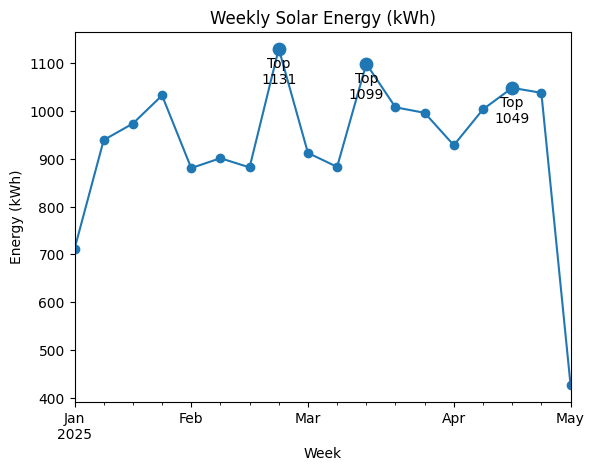

In [52]:
# --- Exercise 1: Plot weekly energy and highlight top 3 weeks ---
import pandas as pd
import numpy as np

# Optional plotting (guard if matplotlib is unavailable)
try:
    import matplotlib.pyplot as plt
    MATPLOTLIB_OK = True
except Exception:
    MATPLOTLIB_OK = False

# Create synthetic daily production and features
np.random.seed(7)
dates = pd.date_range("2025-01-01", periods=120, freq="D")
irradiance = np.clip(np.random.normal(650, 120, size=len(dates)), 250, 900)  # W/m^2
temperature = np.random.normal(25, 5, size=len(dates))                      # °C

# Simulate panel categories
panel_types = np.random.choice(["Mono", "Poly", "ThinFilm"], size=len(dates), p=[0.5, 0.35, 0.15])

# Daily energy (kWh) ~ irradiance with noise; mild temp penalty
energy = (irradiance * 0.22) - (np.maximum(0, temperature - 28) * 2.5) + np.random.normal(0, 15, size=len(dates))
energy = np.clip(energy, 20, None)  # No negative production

df = pd.DataFrame({
    "timestamp": dates,
    "panel_type": panel_types,
    "irradiance_Wm2": irradiance,
    "temperature_C": temperature,
    "daily_energy_kWh": energy
}).set_index("timestamp")

# Weekly aggregation (sum of energy per week)
weekly = df["daily_energy_kWh"].resample("W").sum().to_frame(name="weekly_energy_kWh")

# Find Top-3 weeks
top3 = weekly["weekly_energy_kWh"].nlargest(3)

print("Weekly energy (kWh) - head:")
display(weekly.head())

print("\nTop-3 weeks by total energy:")
display(top3)

# Plot if possible
if MATPLOTLIB_OK:
    # --- Plot weekly energy and highlight top 3 weeks ---
    ax = weekly["weekly_energy_kWh"].plot(kind="line", marker="o", title="Weekly Solar Energy (kWh)")
    # Highlight top-3 with scatter
    ax.scatter(top3.index, top3.values, s=80, zorder=3)
    for ts, val in top3.items():
        ax.annotate(f"Top\n{val:.0f}", (ts, val), textcoords="offset points", xytext=(0, -25), ha="center")
    ax.set_xlabel("Week")
    ax.set_ylabel("Energy (kWh)")
    plt.show()
else:
    print("\n[Info] matplotlib not available - showing table only.")


#### תרגיל 2: מתאמים בין משתנים ופילוח קטגוריאלי

1) חשב מטריצת מתאמים בין **irradiance_Wm2**, **temperature_C**, ו־**daily_energy_kWh**.  
2) השתמש ב־`value_counts()` לראות את התפלגות סוגי הפאנלים.  
3) חשב ממוצע **daily_energy_kWh** לפי `panel_type`, הצג את **שלושת** הסוגים בעלי הממוצע הגבוה ביותר (אם יש יותר משלושה, בחר Top-3).  
4) אם `matplotlib` זמין, הצג גרף עמודות ל־Top-3 קטגוריות.


Correlation matrix:


,irradiance_Wm2,temperature_C,daily_energy_kWh
irradiance_Wm2,1.000000,-0.008201,0.857692
temperature_C,-0.008201,1.000000,-0.140212
daily_energy_kWh,0.857692,-0.140212,1.000000



Panel type distribution (value_counts):


panel_type
Mono        59
Poly        38
ThinFilm    23
Name: count, dtype: int64


Mean daily energy by panel type:


panel_type
Mono        141.973341
ThinFilm    141.104425
Poly        136.241320
Name: daily_energy_kWh, dtype: float64


Top-3 panel types by mean daily energy:


panel_type
Mono        141.973341
ThinFilm    141.104425
Poly        136.241320
Name: daily_energy_kWh, dtype: float64

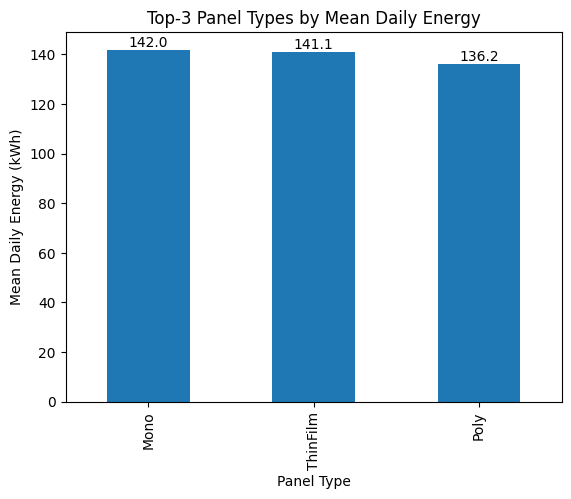

In [53]:
# --- Exercise 2: Correlations and top categories ---
# 1) Correlation matrix
corr = df[["irradiance_Wm2", "temperature_C", "daily_energy_kWh"]].corr(numeric_only=True)
print("Correlation matrix:")
display(corr)

# 2) Category distribution
print("\nPanel type distribution (value_counts):")
display(df["panel_type"].value_counts())

# 3) Mean energy by panel type and top-3
mean_by_type = df.groupby("panel_type")["daily_energy_kWh"].mean().sort_values(ascending=False)
top3_types = mean_by_type.nlargest(3)

print("\nMean daily energy by panel type:")
display(mean_by_type)

print("\nTop-3 panel types by mean daily energy:")
display(top3_types)

# 4) Optional bar plot
if 'MATPLOTLIB_OK' in globals() and MATPLOTLIB_OK:
    ax = top3_types.plot(kind="bar", title="Top-3 Panel Types by Mean Daily Energy")
    ax.set_xlabel("Panel Type")
    ax.set_ylabel("Mean Daily Energy (kWh)")
    for i, v in enumerate(top3_types.values):
        ax.text(i, v, f"{v:.1f}", ha="center", va="bottom")
    plt.show()


#### תרגיל 3 : Weekly “Revenue” מדומה והצלבת Top-3
לפעמים יש קשר בין תפוקה לבין הכנסה (למשל מכירת חשמל לרשת).  
ניצור **הכנסה שבועית מדומה** ע״י הכפלת האנרגיה במחיר־ליחידה משתנה, נצייר אותה, ונשווה **Top-3** שבועות באנרגיה מול הכנסה.

Weekly revenue (synthetic):


,weekly_energy_kWh,price_per_kWh,weekly_revenue
timestamp,,,
2025-01-05,711.538415,0.488851,347.836187
2025-01-12,939.474032,0.512805,481.766865
2025-01-19,973.988888,0.595902,580.402347
2025-01-26,1032.881064,0.641802,662.904674
2025-02-02,880.738782,0.480421,423.125031



Top-3 weeks by revenue:


timestamp
2025-01-26    662.904674
2025-03-30    615.341544
2025-02-23    607.262201
Name: weekly_revenue, dtype: float64


Overlap between Top-3 energy and Top-3 revenue weeks: 1
Overlapping week dates: [datetime.date(2025, 2, 23)]


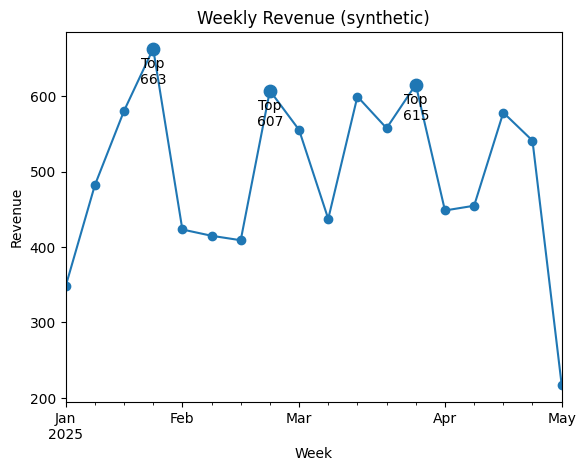

In [54]:
# --- Exercise 3 (Optional): Weekly revenue proxy & cross-compare top-3 ---
# Create a synthetic weekly price per kWh (random within a band)
weekly_price = pd.Series(
    np.random.uniform(0.45, 0.65, size=len(weekly)),
    index=weekly.index,
    name="price_per_kWh"
)
weekly_with_rev = weekly.join(weekly_price)
weekly_with_rev["weekly_revenue"] = weekly_with_rev["weekly_energy_kWh"] * weekly_with_rev["price_per_kWh"]

print("Weekly revenue (synthetic):")
display(weekly_with_rev.head())

# Identify top-3 by revenue
top3_rev = weekly_with_rev["weekly_revenue"].nlargest(3)
print("\nTop-3 weeks by revenue:")
display(top3_rev)

# Compare overlap with top-3 energy weeks
overlap_weeks = set(top3.index.date).intersection(set(top3_rev.index.date))
print(f"\nOverlap between Top-3 energy and Top-3 revenue weeks: {len(overlap_weeks)}")
print("Overlapping week dates:", sorted(overlap_weeks))

if 'MATPLOTLIB_OK' in globals() and MATPLOTLIB_OK:
    ax = weekly_with_rev["weekly_revenue"].plot(marker="o", title="Weekly Revenue (synthetic)")
    ax.scatter(top3_rev.index, top3_rev.values, s=80, zorder=3)
    for ts, val in top3_rev.items():
        ax.annotate(f"Top\n{val:.0f}", (ts, val), textcoords="offset points", xytext=(0, -25), ha="center")
    ax.set_xlabel("Week")
    ax.set_ylabel("Revenue")
    plt.show()


`````{admonition} סיכום
:class: tip
- קיבלנו תמונה מהירה של הנתונים באמצעות `value_counts`, `nlargest`, ומטריצת מתאמים.  
- זיהינו **Top-3** שבועות בתפוקה והדגשנו אותם בגרף.  
- בחנו קשרים בין משתנים פיזיקליים (קרינה/טמפרטורה/תפוקה), ופילחנו לפי קטגוריות (סוג פאנל).  
- הרחבנו לאנליזה נגזרת (Revenue) כדי להדגים שימוש זהה בכלי החקירה.

כלים אלו מספקים **תגובה מהירה** לשאלות ראשוניות ומכוונים אותנו להמשך חקירה מעמיקה או לבניית מודלים.
`````


In [55]:
import json
from jupyterquiz import display_quiz

quiz_json = \
'''
[{
  "question": "בעת ניתוח נתוני מערכת סולארית, נרצה לזהות את שלושת השבועות שבהם ייצור האנרגיה הכולל (weekly_energy_kWh) היה הגבוה ביותר, ולהציגם בגרף קווי.<br><br>איזה רצף פעולות מתאים לכך בפנדס?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "להשתמש ב־resample('W').sum() כדי לאחד מדידות לפי שבוע, ולאחר מכן ב־nlargest(3) למציאת השבועות בעלי הערכים הגבוהים ביותר, ולצייר גרף קווי עם סימון השבועות הללו.",
      "correct": true,
      "feedback": "נכון! זהו השילוב הנכון: דגימה שבועית בעזרת resample, סינון Top-3 באמצעות nlargest, והצגה ויזואלית עם plot."
    },
    {
      "answer": "להשתמש ב־groupby('week').mean() ולמיין את כל השבועות בסדר עולה לפי האנרגיה.",
      "correct": false,
      "feedback": "לא מדויק — groupby דורש עמודת שבוע מוגדרת מראש, בעוד ש־resample מטפל ישירות באינדקס הזמן."
    },
    {
      "answer": "להשתמש ב־rolling(7).sum() כדי לחשב סכום נע, ולאחר מכן ב־sort_values() כדי לזהות את השבועות החזקים ביותר.",
      "correct": false,
      "feedback": "לא — rolling מחשב ממוצע נע ואינו מבצע דגימה שבועית אמיתית כמו resample."
    },
    {
      "answer": "להשתמש ב־pivot_table ולחשב סכום לפי קטגוריה של שבוע ולא לפי תאריך.",
      "correct": false,
      "feedback": "לא נכון — pivot_table מתאים לנתונים קטגוריאליים, לא לדגימה לפי אינדקס זמן."
    }
  ]
}]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>